#  Map Placement for City of Toronto Wayfinding Project

 ---[HackOn(Data)](http://hackondata.com/) Contest Challenge, Sep 10-11, 2016

Qian(John) Xie, Mingfei Cao, and Roland Sing

**[HackOnData](http://hackondata.com/)** is a free two-day event that brings together the Toronto data community to take a closer look at the data that touches our daily lives. Teams of Toronto's top data scientists and data engineers collaborated to generate practical insights from data provided by local companies, not-for profits and the government. Prior to the event, weekly workshops and challenges help prepare participants by giving them the knowledge and hands-on experience required to ensure they can meaningfully participate. During the event, well-known mentors from Toronto and around the world engaged with participants to take their knowledge and skill to the next level. HackOn(Data) is the best platform available to local data talent and businesses to meet, collaborate, and exchange knowledge and experience.

**Sponsers**  
TranQuant, flipp, wattpad, LoyaltyOne, amazon, Lightbend, GuruLink, Shopify

** Partners**  
Toronto Apache Spark, scalator, Deep Learning Toronto, HackerNest, HacherNest Toronto Tech Socials, TechToronto, DMZ, City of Toronto, Toronto Public Library

## Contents

[1 Introduction](#1)
  * [1.1 Background and Motivation](#1.1)
  * [1.2 Objective](#1.2)
  * [1.2 Our Approach](#1.3)
  * [1.3 Overview of Solution Process](#1.4)
  * [1.4 Python Packages](#1.5)

[2 Data](#2)
  * [2.1 Pedestrian and Vehicle Volume Data of Major Intersections](#2.1)
  * [2.2 Cultural Facility Data](#2.2)

[3 Expoloratory Data Analysis](#3)
  * [3.1 Pedestrian and Vehicle Volume Distribution](#3.1)
  * [3.2 Intersections and Cultural Facilities Distribution Plot](#3.2)
  * [3.3 Clustering Facilities Using DBSCAN Algorithm](#3.3)
  * [3.4 DBSCAN for Phase-wise Implementation](#3.4)
  * [3.5 Clustering Facilities Using KMeans Algorithm](#3.5)

[4 Map Placement Based on Facility Clustering](#4)
  * [4.1 Only Consider Distance](#4.1)
  * [4.2 Consider Distance and Pedestrian Volume](#4.2)

[5 Future Improvement](#5)

## 1. Introduction
<a id = '1'></a>

### 1.1 Background and Motivation
<a id = '1.1'></a>

In 2011, City of Toronto launched the [TO360 Wayfinding Project](https://www1.toronto.ca/wps/portal/contentonly?vgnextoid=8057524d63f02410VgnVCM10000071d60f89RCRD). The integrated multi-modal wayfinding strategy is comprised of pedestrian, vehicular, cyclying and transit wayfinding. The project is aimed to:
* Enhance the overall image of Tornto as a destination
* Increase visitors at key attractions, spending in the Greater Toronto Area, boost the local econnomy
* Increase confidence to walk, reduce walk times, promote multi-modal transit and reduce auto use
* Improve urban realm, sense of community, pedestrian safety, health and environment

The project is implemented in three phases:  
* Phase 1: Wayfinding strategies (2011 - 2012)
* Phase 2: Pilot implementation  (2014 - 2015)
* Phase 3: City-wide roll out   (2016 - 2017)

Right now, the project in in phase 3. In determining where wayfinding products are required, a number of factors were considered:

**Existing Need** - The implementation strategy prioritizes areas where a need for wayfinding currently exists based on:  
* having high densities of visitors who are unfamiliar with the city
* having high pedestrian volumnes
* having changes in mode of travel
* being on a main street
* being an area that is difficult to navigate
* being close to hospitals, colleges or universities
* being close to a city centre

** Available Funding** - Further, certain areas may be prioritized as project partners come forward with funding to implement the schem.  Potential project partners include:  
* transit agencies
* Business Improvment Areas
* universities and health care campuses
* attractions
* city divisions
* tourism organizations

### 1.2 Objective
<a id = '1.2'></a>

For the **HackOn(Data)** event, City of Toronto have an interest in exploring a more data-driven methodology to determine the timing and geographic distribution of the required TO360 map assest upgrades. The data-driven methodology may help gain valuable insights from a different and novel perspective and help domain experts to make more effective and reliable map placement plan.

**Reference**: [Toronto Wayfinding Strategy](http://www1.toronto.ca/wps/portal/contentonly?vgnextoid=8057524d63f02410VgnVCM10000071d60f89RCRD&vgnextchannel=d90d4074781e1410VgnVCM10000071d60f89RCRD)


### 1.3 Our Approach
<a id = '1.3'></a>
We choose an expoloratory approach for this problem. We are not aiming to find a "perfect" solution by considering all needs and using all the available data. Instead, our goal is to build a prototype model using the a few of the most important data sources(provided by [TranQuant](http://tranquant.com/) and [City of Toronto Open Data](http://www1.toronto.ca/wps/portal/contentonly?vgnextoid=9e56e03bb8d1e310VgnVCM10000071d60f89RCRD)). If we can gain insights from the solution and the methodology is actionable, we can refine the prototype methodology by taking into consideration more needs, incooporating more data sources, and using more advanced algorithms.

Among the four aspects of the multi-modal wayfinding strategy, we focus on the **pedestrian wayfinding**. We chose to analyze two datasets from the City of Toronto, available on TranQuant:  
* Cultural Spaces: This dataset is a compilation of all spaces within the 44 City wards that were available for cultural use for a five year period.
* Signalized Intersection Traffic and Pedestrians: This dataset contains traffic and pedestrian volume data collected at intersections where there are traffic signals from 1999 to 2015.


### 1.4 Overview of Solution Process
<a id = '1.4'></a>
Aftering deciding to use the above two datasets, the study began with a single question: what criteria should we consider when choosing an intersection to place map?

In the begining, we considered the problem as an optimization problem. After some discussion, we decided this direction is possible but might be difficult to implement in a two-day time limite. Then we did some exploratory data analysis by plotting the intersections and facilities geographic distribution on map. After seeing the plot, we thought clustering is a direction we should try. The logic is as follows: 

1. Clustering the facilites into groups according to their geographic distribution
2. Find the geographic coordinates of each facility cluster centroid
3. Select the closest three intersections to a facility cluster centroid
4. Among the closest three intersections, choose the intersection with the highest pedestrian volume

The logic is heuristic but simple and easy to implement, so we managed to build a solution based on this logic within the two day time limit. 

I tried two clustering algorithms: DBSCAN and KMeans. DBSCAN is density-based clustering while KMeans is centroid-based clustering

At this stage, I adopted KMeans algorithm. KMeans works better to spatially evenly divide our facilities into clusters according to their geographic coordinates. DBSCAN can provide another perspective of looking at the problem and we can explore that angle in the future.


### 1.5 Python Packages
<a id = '1.5'></a>
The following are the major data science related packages used for this project:
* Python 2.7
* Jupyter Notebook
* Numpy
* Scipy
* Pandas
* Matplotlib
* scikit-learn
* seaborn
* folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import folium
from folium import plugins
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from scipy import spatial
import time
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## 2. Data Preparation
<a id = '2'></a>
* Pedestrian and Vehicle Volume Data of Major Intersections in the City of Toronto
  - `ped_vol_2012.csv`: pedestrian and vehicle volume data collected at some intersections in 2012 
  - `ped_vol_2013.csv`: pedestrian and vehicle volume data collected at some intersections in 2013
  - `ped_vol_2014.csv`: pedestrian and vehicle volume data collected at some intersections in 2014
  - `ped_vol_2015.csv`: pedestrian and vehicle volume data collected at some intersections in 2015
  - `signalizedTrafficPedestrianVolumes.csv` - pedestrian and vehicle volume data collected at some intersections from 1999 - 2012



* Cultural Facility Data in the City of Toronto
  The same data was provided in three formats
  - `MSFC_44_Wards_Complete_Final.csv`: List of cultural facilities in Toronto. The file consists of the name of the facility, address, ward information, ownership of facilities that are available on a rental basis for cultural events. There two accompanying documents `MSFC_Readme_1.csv` and `MSFC_Readme_2.csv` give detailed describe the contents of the file and the schema(columns) of the file. The `MSFC_44_Wards_Complete_Final.csv` only provides postal code, no coordinates for facility. 
  
  - `Make_space_for_culture_mtm3.zip`:  with shape files of MTM 3 coordinate system and facility file `MAKE_SPACE_FOR_CULTURE.dbf`, which contains coordinates for facilities. 
  - `Make_space_for_culture_wgs84.zip`: with shape files for WGS84 coordinate system and facility file `MAKE_SPACE_FOR_CULTURE_WGS84.dbf`, which contains coordinates for facilities.
  

### 2.1 Pedestrian and Vehicle Volume Data of Major Intersections
<a id = '2.1'></a>

#### Data Description :
---

* **PX**: Intersection unique ID
* **Main**: Main street name
* **Midblock Route**: Mid block description
* **Side 1 Route**: Side street name one
* **Side 2 Route**: Side street name two
* **Activation Date**: Date of Activation
* **Latitude**: Latitude geo-coordinate
* **Longitude**: Longitude geo-coordinate
* **Count Date**: Date of Count
* **8HrPedVol**: 8 hour pedestrian volume
* **8HrVehVol**: 8 hour vehicle volume
* **24HrPedVol**: 24 hour pedestrian volume
* **24HrVehVol**: 24 hour vehicle volume

**Note** 
1. The 8 hour pedestrian and vehicle volume count are taken approx. 7:30 am - 6:30 pm with breaks.
2. Only `signalizedTrafficPedestrianVolumes.csv` file contains `24HrPedVol` and `24HrVehVol` columns. And after careful examination, we found that the `24HrPedVol` = 2 x `8HrPedVol`, and `24HrVehVol` = 2 x `8HrVehVol`. So we can drop the two columns without affecting our analysis.

In [2]:
# Data collected in 2012
intersection_2012_df = pd.read_csv("./Data/ped_vol_2012.csv", header=None,
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2012_df.head()

PX         main midblock_route     side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   4    JARVIS ST            NaN   ADELAIDE ST E         NaN     12-Sep-1958  43.651534 -79.372360  8/15/2012        19037         5679
1  14   BLOOR ST E            NaN  TED ROGERS WAY         NaN     28-Mar-1951  43.671577 -79.380520  5/31/2012        16991         7835
2  22    CHURCH ST            NaN    GERRARD ST E         NaN     18-Jul-1941  43.659858 -79.378522   9/5/2012        17164        14490
3  25   BLOOR ST E            NaN       CHURCH ST         NaN     19-Feb-1932  43.671022 -79.383123  5/30/2012        18894        26556
4  27  VICTORIA ST            NaN   RICHMOND ST E         NaN     03-Nov-1927  43.651952 -79.377756  7/10/2012        12770         6969

In [3]:
# check to make sure data types are correct
intersection_2012_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [4]:
# check number of records
intersection_2012_df.shape

(468, 11)

In [5]:
# Data collected in 2013
intersection_2013_df = pd.read_csv("./Data/ped_vol_2013.csv",
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2013_df.head()

PX               main midblock_route   side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0  13  MOUNT PLEASANT RD            NaN  CHARLES ST E   JARVIS ST     23-May-1950  43.669989 -79.379923  10/8/2013        15228         2269
1  23          CHURCH ST            NaN    CARLTON ST         NaN     17-Feb-1932  43.661871 -79.379335  6/26/2013        19901         9052
2  55           YONGE ST            NaN  LAWRENCE AVE         NaN     03-Jan-1941  43.725103 -79.402193  10/3/2013        29417         4196
3  81     UNIVERSITY AVE            NaN   DUNDAS ST W         NaN     28-Jun-1928  43.654812 -79.388484  8/14/2013        28831        18932
4  86          AVENUE RD            NaN    BLOOR ST W         NaN     21-Jul-1928  43.668685 -79.394119  5/27/2013        26039        14160

In [6]:
# check to make sure data types are correct
intersection_2013_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [7]:
# check number of records
intersection_2013_df.shape

(295, 11)

In [8]:
# Data collected in 2014
intersection_2014_df = pd.read_csv("./Data/ped_vol_2014.csv",
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2014_df.head()

PX      main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0  29  YONGE ST            NaN       FRONT ST         NaN     24-Aug-1928  43.646846 -79.376931   5/6/2014        10737        17522
1  30  YONGE ST            NaN  WELLINGTON ST         NaN     06-Jan-1964  43.647848 -79.377351   5/6/2014        13620        26656
2  33  YONGE ST            NaN    RICHMOND ST         NaN     03-Nov-1927  43.651697 -79.378965   5/6/2014        12388        24487
3  34  YONGE ST            NaN       QUEEN ST         NaN     03-Nov-1927  43.652421 -79.379276   5/5/2014        12035        26437
4  35  YONGE ST            NaN      SHUTER ST         NaN     12-Mar-1959  43.654066 -79.379957  5/10/2014         7830        21137

In [9]:
# check to make sure data types are correct
intersection_2014_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [10]:
# check number of records
intersection_2013_df.shape

(295, 11)

In [11]:
# Data collected in 2014
intersection_2015_df = pd.read_csv("./Data/ped_vol_2015.csv",
                                   names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 'activation_date',
                                    'latitude', 'longitude', 'count_date', '8hr_vel_vol', '8hr_ped_vol'],
                                   skiprows=1)
intersection_2015_df.head()

PX         main midblock_route  side1_route      side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   8    JARVIS ST            NaN  DUNDAS ST E              NaN     21-Jun-1928  43.657052 -79.374531  4/13/2015        18207         7458
1  15    CHURCH ST            NaN   FRONT ST E  WELLINGTON ST E     24-Apr-1950  43.648513 -79.373834  4/20/2015        10467         7381
2  21  DUNDAS ST E            NaN    CHURCH ST              NaN     17-Dec-1952  43.656499 -79.377127  4/13/2015        13764        10302
3  31     YONGE ST            NaN      KING ST              NaN     03-Nov-1927  43.649162 -79.377904  1/22/2015        13527        33938
4  36     YONGE ST            NaN    DUNDAS ST              NaN     04-Apr-1927  43.656326 -79.380912  4/11/2015        10925        34615

In [12]:
# check to make sure data types are correct
intersection_2015_df.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
dtype: object

In [13]:
# check number of records
intersection_2015_df.shape

(293, 11)

In [14]:
# Data collected in 1999-2012, in the signalizedTrafficPedestrianVolumes.csv file 
# note that in the signalizedTrafficPedestrianVolumes.csv file 
# the 8hr_vel_vol, 8hr_ped_vol, 24hr_vel_vol, and 24hr_ped_vol columns
# contains comma in the number for the thousands marker. So you need to use the 
# keyword parameter thousands ="," to correly read the table.
# otherwise those columns will be returned as object(string) columns
intersection_1999_2012_df1 = pd.read_csv("./Data/signalizedTrafficPedestrianVolumes.csv",
                            names=['PX', 'main', 'midblock_route', 'side1_route', 'side2_route', 
                                   'activation_date','latitude', 'longitude', 'count_date',
                                   '8hr_vel_vol', '8hr_ped_vol', '24hr_ped_vol', '24hr_veh_vol'],
                             skiprows=1, thousands=",")
intersection_1999_2012_df1.head()

PX       main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol  24hr_ped_vol  24hr_veh_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN      11/15/1948  43.649450 -79.371410   9/8/2011        17008        19335         34016         38670
1   3  KING ST E            NaN      JARVIS ST         NaN       8/23/1950  43.650461 -79.371924   9/7/2011        37719        17665         75438         35330
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN       9/12/1958  43.651534 -79.372360  6/16/2008         1991        19726          3982         39452
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN       4/21/1962  43.652718 -79.372824  7/30/2009         2696        24842          5392         49684
4   6  JARVIS ST            NaN     QUEEN ST E         NaN       8/24/1928  43.653704 -79.373238  5/18/2011         3622        19772          7244         39544

In [15]:
# check to make sure data types are correct
intersection_1999_2012_df1.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
24hr_ped_vol         int64
24hr_veh_vol         int64
dtype: object

In [16]:
# check number of records
intersection_1999_2012_df1.shape

(2209, 13)

In [17]:
intersection_1999_2012_df1['24hr_ped_vol'].describe()

count     2209.000000
mean      3612.813038
std       7389.870175
min          0.000000
25%        652.000000
50%       1550.000000
75%       3178.000000
max      96674.000000
Name: 24hr_ped_vol, dtype: float64

In [18]:
# busiest intersection by pedestrian volume 1999-2012
intersection_1999_2012_df1.sort_values(by='24hr_ped_vol', ascending=False).head()

PX         main midblock_route     side1_route     side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol  24hr_ped_vol  24hr_veh_vol
34  36     YONGE ST            NaN     DUNDAS ST E     DUNDAS ST W        4/4/1927  43.656326 -79.380912  1/28/2008        48337        16515         96674         33030
47  49     YONGE ST            NaN  EGLINTON AVE E  EGLINTON AVE W       8/21/1929  43.706750 -79.398311  9/20/2011        40740        23542         81480         47084
62  64       BAY ST            NaN      QUEEN ST W             NaN       11/3/1927  43.651890 -79.381698  8/31/2011        38815        19155         77630         38310
1    3    KING ST E            NaN       JARVIS ST             NaN       8/23/1950  43.650461 -79.371924   9/7/2011        37719        17665         75438         35330
64  66  DUNDAS ST W            NaN          BAY ST             NaN       6/28/1928  43.655721 -79.383734  8/12/2009        35585        22106         71170         44212

In [19]:
# busiest intersection by vehicle volume 1999-2012
intersection_1999_2012_df1.sort_values(by='24hr_veh_vol', ascending=False).head()

PX                main midblock_route              side1_route   side2_route activation_date   latitude  longitude  count_date  8hr_vel_vol  8hr_ped_vol  24hr_ped_vol  24hr_veh_vol
1259  1262       STEELES AVE E            NaN      HWY 404 NB OFF RAMP  WOODBINE AVE      10/13/1966  43.813916 -79.348754  12/14/2010          500        53678          1000        107356
698    701          MARKHAM RD            NaN           SHEPPARD AVE E           NaN       4/27/1964  43.793900 -79.238760    5/5/2010         1271        40128          2542         96773
636    639            YONGE ST            NaN  401 C W YONGE ST S RAMP           NaN       5/24/1966  43.754840 -79.408840    2/7/2007            4        47427             8         94854
615    618         DUFFERIN ST            NaN              FINCH AVE W           NaN        1/1/1967  43.768870 -79.466898   5/25/2010         1341        43290          2682         92241
1403  1407  WILLIAM R ALLEN RD            NaN           SHEPPARD AVE W           NaN       7/12/1981  43.750280 -79.463380   4/14/2010          490        45095           980         90190

** Note**   
About `intersection_1999_2012_df` dataframe, if you look carefully, the `24hr_ped_vol` and `24hr_veh_vol` are just 2x `8hr_ped_vol` and 2x `8hr_veh_vol` respectively. They are redundant columns and can be dropped.

In [20]:
intersection_1999_2012_df=intersection_1999_2012_df1.drop(['24hr_ped_vol', '24hr_veh_vol'], axis = 1)
intersection_1999_2012_df.head()

PX       main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN      11/15/1948  43.649450 -79.371410   9/8/2011        17008        19335
1   3  KING ST E            NaN      JARVIS ST         NaN       8/23/1950  43.650461 -79.371924   9/7/2011        37719        17665
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN       9/12/1958  43.651534 -79.372360  6/16/2008         1991        19726
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN       4/21/1962  43.652718 -79.372824  7/30/2009         2696        24842
4   6  JARVIS ST            NaN     QUEEN ST E         NaN       8/24/1928  43.653704 -79.373238  5/18/2011         3622        19772

In [21]:
intersection_1999_2012_df1.dtypes

PX                   int64
main                object
midblock_route      object
side1_route         object
side2_route         object
activation_date     object
latitude           float64
longitude          float64
count_date          object
8hr_vel_vol          int64
8hr_ped_vol          int64
24hr_ped_vol         int64
24hr_veh_vol         int64
dtype: object

In [22]:
# check number of records
intersection_1999_2012_df.shape

(2209, 11)

#### Combine All Intersection Data into Single DataFrame

In [23]:
# check the total number of intersection records
total_intersection_records = (intersection_1999_2012_df.shape[0]+ intersection_2012_df.shape[0]
                              + intersection_2013_df.shape[0]+ intersection_2014_df.shape[0]
                              + intersection_2015_df.shape[0])
print total_intersection_records

3563


In [24]:
# combine all intersection data 
frames =[intersection_1999_2012_df, intersection_2012_df, 
         intersection_2013_df, intersection_2014_df,
         intersection_2015_df]
intersection_all_df = pd.concat(frames)
intersection_all_df.head()

PX       main midblock_route    side1_route side2_route activation_date   latitude  longitude count_date  8hr_vel_vol  8hr_ped_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN      11/15/1948  43.649450 -79.371410   9/8/2011        17008        19335
1   3  KING ST E            NaN      JARVIS ST         NaN       8/23/1950  43.650461 -79.371924   9/7/2011        37719        17665
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN       9/12/1958  43.651534 -79.372360  6/16/2008         1991        19726
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN       4/21/1962  43.652718 -79.372824  7/30/2009         2696        24842
4   6  JARVIS ST            NaN     QUEEN ST E         NaN       8/24/1928  43.653704 -79.373238  5/18/2011         3622        19772

In [25]:
# double check to the combined the dataframe has the same number of records
print total_intersection_records == intersection_all_df.shape[0]

True


In [26]:
# PX is a unique ID for an intersection, if we sort the combined dataframe by 'PX'
# We can see that some of the intersections have multiple records of pedestrian
# and vehicle volume data.
intersection_all_df.sort_values('PX')

PX               main midblock_route                 side1_route               side2_route activation_date   latitude  longitude  count_date  8hr_vel_vol  8hr_ped_vol
0        2          JARVIS ST            NaN                  FRONT ST E                       NaN      11/15/1948  43.649450 -79.371410    9/8/2011        17008        19335
1        3          KING ST E            NaN                   JARVIS ST                       NaN       8/23/1950  43.650461 -79.371924    9/7/2011        37719        17665
2        4          JARVIS ST            NaN               ADELAIDE ST E                       NaN       9/12/1958  43.651534 -79.372360   6/16/2008         1991        19726
0        4          JARVIS ST            NaN               ADELAIDE ST E                       NaN     12-Sep-1958  43.651534 -79.372360   8/15/2012        19037         5679
3        5          JARVIS ST            NaN               RICHMOND ST E                       NaN       4/21/1962  43.652718 -79.372824   7/30/2009         2696        24842
4        6          JARVIS ST            NaN                  QUEEN ST E                       NaN       8/24/1928  43.653704 -79.373238   5/18/2011         3622        19772
5        7          JARVIS ST            NaN                   SHUTER ST                       NaN      11/18/1948  43.655357 -79.373862   5/24/2011         1979        17492
6        8          JARVIS ST            NaN                 DUNDAS ST E                       NaN       6/21/1928  43.657052 -79.374531   5/18/2011         5651        20116
0        8          JARVIS ST            NaN                 DUNDAS ST E                       NaN     21-Jun-1928  43.657052 -79.374531   4/13/2015        18207         7458
7        9          JARVIS ST            NaN                GERRARD ST E                       NaN       7/14/1941  43.660432 -79.375854   5/18/2011         4284        19891
8       10          JARVIS ST            NaN                  CARLTON ST                       NaN       6/28/1928  43.662420 -79.376708   5/24/2011         4189        21040
9       11          JARVIS ST            NaN              WELLESLEY ST E                       NaN       9/28/1948  43.666289 -79.378325   5/24/2011         5001        21072
10      12          JARVIS ST            NaN                 ISABELLA ST                       NaN       9/13/1960  43.668869 -79.379416   5/18/2011         1679        15958
0       13  MOUNT PLEASANT RD            NaN                CHARLES ST E                 JARVIS ST     23-May-1950  43.669989 -79.379923   10/8/2013        15228         2269
11      13  MOUNT PLEASANT RD            NaN                CHARLES ST E                 JARVIS ST       5/23/1950  43.669989 -79.379923   5/24/2011         2094        20343
12      14         BLOOR ST E            NaN              TED ROGERS WAY                       NaN       3/28/1951  43.671577 -79.380520   12/8/2009         4426        15399
1       14         BLOOR ST E            NaN              TED ROGERS WAY                       NaN     28-Mar-1951  43.671577 -79.380520   5/31/2012        16991         7835
13      15          CHURCH ST            NaN                  FRONT ST E           WELLINGTON ST E       4/24/1950  43.648513 -79.373834   4/23/2009         8053        16666
1       15          CHURCH ST            NaN                  FRONT ST E           WELLINGTON ST E     24-Apr-1950  43.648513 -79.373834   4/20/2015        10467         7381
14      16          KING ST E            NaN                   CHURCH ST                       NaN       1/10/1928  43.649916 -79.374409   4/23/2009        11277        13419
15      17          CHURCH ST            NaN               ADELAIDE ST E                       NaN      11/22/1948  43.651173 -79.374925   7/27/2011         5765        12868
16      18          CHURCH ST            NaN               RICHMOND ST E                       NaN      11/22/1948  43.652441 -79.375448  11/19/2007         4

#### Average pedestrian and vehicle volume for intersections with multiple record
We only want unique intersections in the final dataframe, so we need to average the multiple records for a single intersection.

1. Create two dataframes from `intersection_ped_df` data frame.
2. The first dataframe contain colums `PX`, `main`, `midblock_route`, `side1_route`, `side2_route`, `latitude`, and `longitude`. Remove duplicates based on PX, so we have unique intersections.
3. Second dataframe contain columns `PX`,  average `8hr_vel_vol`,  and average `8hr_ped_vol`
4. Join the two dataframes by `PX`

In [27]:
# first dataframe 
unique_intersection_df = intersection_all_df[['PX', 'main', 'midblock_route', 'side1_route', 
                              'side2_route', 'latitude', 'longitude']].drop_duplicates('PX')

unique_intersection_df.count() #2256 unique intersections

PX                2256
main              2256
midblock_route     171
side1_route       2256
side2_route        766
latitude          2256
longitude         2256
dtype: int64

In [28]:
# seond dataframe
avg_ped_vel_df = intersection_all_df[['PX', '8hr_vel_vol', '8hr_ped_vol']].groupby('PX').mean()
avg_ped_vel_df.count()

8hr_vel_vol    2256
8hr_ped_vol    2256
dtype: int64

In [29]:
avg_ped_vel_df.head()

8hr_vel_vol  8hr_ped_vol
PX                          
2       17008.0      19335.0
3       37719.0      17665.0
4       10514.0      12702.5
5        2696.0      24842.0
6        3622.0      19772.0

In [30]:
# Join the two dataframes
# This dataframe will be the final dataframe for analysis use
intersection_ped_df = unique_intersection_df.join(avg_ped_vel_df, on='PX', how = 'inner')
intersection_ped_df.head()

PX       main midblock_route    side1_route side2_route   latitude  longitude  8hr_vel_vol  8hr_ped_vol
0   2  JARVIS ST            NaN     FRONT ST E         NaN  43.649450 -79.371410      17008.0      19335.0
1   3  KING ST E            NaN      JARVIS ST         NaN  43.650461 -79.371924      37719.0      17665.0
2   4  JARVIS ST            NaN  ADELAIDE ST E         NaN  43.651534 -79.372360      10514.0      12702.5
3   5  JARVIS ST            NaN  RICHMOND ST E         NaN  43.652718 -79.372824       2696.0      24842.0
4   6  JARVIS ST            NaN     QUEEN ST E         NaN  43.653704 -79.373238       3622.0      19772.0

In [31]:
intersection_ped_df.dtypes

PX                  int64
main               object
midblock_route     object
side1_route        object
side2_route        object
latitude          float64
longitude         float64
8hr_vel_vol       float64
8hr_ped_vol       float64
dtype: object

In [32]:
intersection_ped_df.shape

(2256, 9)

In total, we have 2256 unique major intersections that have pedestrian and vehicle volume counted. We will select intersections from these ones to place map.

### 2.2 Cultural Facility Data
<a id = '2.2'></a>

#### Data Description
---
**ADD_NUM** = ADDRESS_NUMBER  (Street number)  
**LF_NAME** = LINEAR_NAME_FULL  (Street Name)  
**ADDRESS** = ADDRESS_FULL  (Full address)  
**POSTAL_CD** = POSTAL_CODE  (POSTAL CODE)  
**CITY** = CITY  
**X** = X  (Easting in MTM NAD27 3 degree Projection)  
**Y** = Y  (Northing in MTM NAD27 3 degree Projection)  
**LONGITUDE** = LONGITUDE  (LONGITUDE = Longitude in WGS84 Coordinate System)  
**LATITUDE** = LATITUDE  (Latitude in WGS84 Coordinate System)  
**FAC_NAM** = FACILITY_NAME  (FACILITY NAME)  
**STE_FLR_UN** = SUITE_FLOOR_UNIT  (SUITE FLOOR UNIT)  
**PERFRMANCE** = PERFORMANCE  (Spaces in which performing arts (dance, music, theatre, etc.) creation or presentation takes place)  
**EXHBVISARTT** = EXHIBITION_VISUAL_ARTS  (Spaces in which visual arts creation or presentation can take place, in addition to pure exhibition space.)  
**SCRN_BASED** = SCREEN_BASED  (Spaces for the production and presentation of multimedia screen-based arts including digital, )  
**LIBRARY** = LIBRARY  (Toronto Public Library facility with physical space for cultural activity)  
**MULTIPURP** = MULTIPURPOSE  (Spaces that are not purpose-built and can house a range of cultural activity across disciplines.)  
**HERITAGE** = HERITAGE  (Facilities where heritage activity takes place (historical societies, archives, community museums etc.)  
**OWNERSHIP** = OWNERSHIP  (OWNERSHIP)  
**OBJECTID** = OBJECTID  (Unique system identifier)  

In [33]:
# use lower case column names for facility dataframe
col_names = ['add_num', 'lf_name', 'address', 'postal_cd', 'city', 'x', 'y', 'longitude', 'latitude', 'fac_name',
        'ste_flr_un', 'performance', 'exhbvisart', 'scrn_based', 'library', 'multipurp', 'heritage', 'ownership', 'objectID']

In [34]:
# create facility_df datafrme
facility_df = pd.read_csv('./Data/facilities/make_space_for_culture_wgs84/MAKE_SPACE_FOR_CULTURE_WGS84.csv',
                         names = col_names, skiprows =1)
facility_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199

In [35]:
facility_df.dtypes

add_num         object
lf_name         object
address         object
postal_cd       object
city            object
x              float64
y              float64
longitude      float64
latitude       float64
fac_name        object
ste_flr_un      object
performance      int64
exhbvisart       int64
scrn_based       int64
library          int64
multipurp        int64
heritage         int64
ownership       object
objectID         int64
dtype: object

In [36]:
# 1397 cultural facilities
facility_df.shape

(1397, 19)

We have 1379 cultural facilities in City of Toronto. In next section, we will apply clustering algorithms to group the cultural faciliites into clusters according to their geographic coordinates.

## 3 Exploratory Data Analysis
<a id = '3'></a>

### 3.1 Pedestrian and Vehicle Volume Distribution
<a id = '3.1'></a>

In this section, we will check intersection pedestrian and vehicle volume distribution to see what pattern they follows or to see whether there is any `interesting` behavior in the data.

#### 3.1.1 Pedestrian Volume Distribution

In [37]:
# decriptive of 8 hour pedestrian volume 
intersection_ped_df['8hr_ped_vol'].describe()

count     2256.000000
mean     12163.501263
std       6708.805019
min          0.000000
25%       7476.750000
50%      10704.000000
75%      15490.000000
max      53678.000000
Name: 8hr_ped_vol, dtype: float64

The average 8 hour pedestrian volume is about 12,163 for the surveyed intersections. The smallest pedestrian volume is 0; the maximum pedestrian volume is 53678.

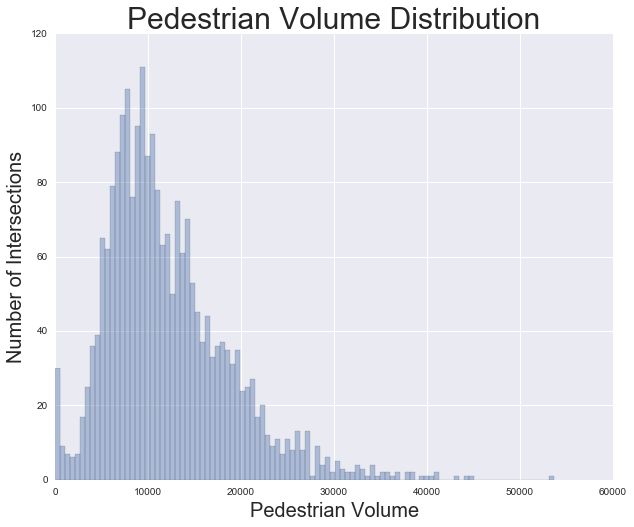

In [38]:
# pedestrian volume distribution
fig, ax = plt.subplots(figsize =(10, 8))
sns.distplot(intersection_ped_df['8hr_ped_vol'].values, bins= 100, kde=False)
ax.set_xlabel('Pedestrian Volume', fontsize = 20)
ax.set_ylabel('Number of Intersections', fontsize = 20)
ax.set_title('Pedestrian Volume Distribution', fontsize = 30)

Let's check what are intersections that have highest pedestrian volume and what are the intersections that have the lowest pedestrian volume.

In [39]:
# sort the dataframe by '8hr_ped_vol' from low to high
sorted_ped_df = intersection_ped_df.sort_values(by ='8hr_ped_vol')
# bottom 20 intersections with the lowest pedestrian volume
bottom20ped = sorted_ped_df[:20] 
# Top 20 intesections with the highest pedestrian volume
top20ped = sorted_ped_df[-20:]

In [40]:
# bottom 20 intersections with the lowest pedestrian volume
bottom20ped

PX             main midblock_route             side1_route     side2_route   latitude  longitude  8hr_vel_vol  8hr_ped_vol
450  2277       KENNEDY RD  261m SOUTH OF            MCNICOLL AVE  PRIVATE ACCESS  43.810750 -79.301297      15862.0          0.0
415  1979    STEELES AVE E            NaN                9TH LINE             NaN  43.842590 -79.225810      11534.0          4.0
290  2312    STEELES AVE W            NaN               ALBION RD  REGIONAL RD 50  43.749850 -79.639290      29577.0         19.0
458  2303      TANGIERS RD            NaN  YORK UNIVERSITY BUSWAY             NaN  43.766976 -79.489708       3016.0         23.0
434  2147       WARDEN AVE  260m NORTH OF            BERTRAND AVE             NaN  43.735467 -79.290688      14910.0         23.0
445  2265   LAWRENCE AVE E   130m EAST OF               LESLIE ST             NaN  43.734837 -79.354340      14164.0         26.0
449  2276      MIDLAND AVE  234m SOUTH OF            MCNICOLL AVE             NaN  43.812660 -79.291300      12410.0         26.0
286  2279       MARKHAM RD  260m SOUTH OF            BRIMORTON DR             NaN  43.771262 -79.229790      16976.0         30.0
286  2307       MILNER AVE            NaN       BURROWS HALL BLVD  PRIVATE ACCESS  43.794850 -79.219610       6089.0         37.0
457  2302          TORO RD            NaN             TANGIERS RD             NaN  43.760450 -79.487310       4630.0         52.0
446  2266    GRANTBROOK ST   88m NORTH OF               BLAKE AVE             NaN  43.780548 -79.432753       4454.0         69.0
447  2267        TALBOT RD   22m NORTH OF               BLAKE AVE             NaN  43.781915 -79.423911       4909.0         89.0
448  2275      BATHURST ST   70m SOUTH OF               KENTON DR  PRIVATE ACCESS  43.777480 -79.443950      21497.0         89.5
292  2332    STEELES AVE W            NaN         GIHON SPRING DR  PRIVATE ACCESS  43.759258 -79.597022      18164.0        101.0
283  2301   HUNTINGWOOD DR            NaN          COMMANDER BLVD             NaN  43.798131 -79.269608       8290.0        109.0
291  2325    BIRCHMOUNT RD            NaN             FOXRIDGE DR             NaN  43.721814 -79.274485       9327.0        115.0
290  2321  OLD KINGSTON RD            NaN              MORRISH RD             NaN  43.783320 -79.170620       4889.0        128.0
287  2309   NORTH QUEEN ST   137m WEST OF                INDEX RD  PRIVATE ACCESS  43.619120 -79.555270      10004.0        168.0
456  2297      MIDLAND AVE            NaN              EMBLEM CRT             NaN  43.778930 -79.275440      10778.0        173.0
289  2311         GUNNS RD  150m NORTH OF          ST CLAIR AVE W  PRIVATE ACCESS  43.673046 -79.472209       4240.0        176.0

In [41]:
### Plot 20 intersections with lowest pedestrian volume on interactive Map
bottom20ped_map = folium.Map(location = [43.6532, -79.3832])
bottom20ped_map.save('bottom20ped.html')
marker_cluster_intersection = folium.MarkerCluster().add_to(bottom20ped_map)
for index, row in bottom20ped.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(marker_cluster_intersection )
bottom20ped_map.save('bottom20ped.html')
bottom20ped_map

In [42]:
# Top 20 intesections with the highest pedestrian volume
top20ped

PX               main midblock_route                side1_route         side2_route   latitude  longitude  8hr_vel_vol  8hr_ped_vol
879    882        DUNDAS ST W            NaN              THE WEST MALL                 NaN  43.627990 -79.559092        105.0      34937.0
756    759  VICTORIA PARK AVE            NaN   401 C E VICTORIA PR RAMP                 NaN  43.766940 -79.319180          0.0      35267.0
806    809        FINCH AVE W            NaN         400 N FINCH E RAMP                 NaN  43.754930 -79.528610         64.0      35544.0
744    747     SHEPPARD AVE E            NaN    404 N SHEPPARD AVE RAMP         YORKLAND RD  43.775890 -79.337750        298.0      35893.0
917    920         KENNEDY RD            NaN  401 C E KENNEDY RD N RAMP  WILLIAM KITCHEN RD  43.773134 -79.284071        137.0      36406.0
405    407     LAWRENCE AVE E            NaN          VICTORIA PARK AVE                 NaN  43.742112 -79.309773       3757.0      36510.0
755    758  VICTORIA PARK AVE            NaN   401 C W VICTORIA PR RAMP                 NaN  43.769472 -79.320536        109.0      36864.0
644    647        BAYVIEW AVE            NaN       401 C W BAYVIEW RAMP                 NaN  43.764483 -79.387379        354.0      38081.0
122    124           YONGE ST            NaN              YORK MILLS RD          WILSON AVE  43.744121 -79.406724       1068.0      38102.0
2060  2113  LAKE SHORE BLVD W            NaN                PARKSIDE DR                 NaN  43.637913 -79.453771         95.0      38490.0
592    595           KEELE ST            NaN      401 C E KEELE ST RAMP                 NaN  43.721220 -79.480900        406.0      38529.0
456    458     EGLINTON AVE E            NaN              BIRCHMOUNT RD                 NaN  43.729990 -79.277840       3069.0      39450.0
1092  1095        FINCH AVE W            NaN         400 S FINCH W RAMP                 NaN  43.753975 -79.532960        187.0      39750.0
613    616        DUFFERIN ST            NaN             BRIDGELAND AVE         YORKDALE RD  43.726973 -79.457655        691.0      40416.0
623    626       DON MILLS RD            NaN              YORK MILLS RD                 NaN  43.755793 -79.347046       4197.0      40868.0
564    567      THE QUEENSWAY            NaN              ISLINGTON AVE                 NaN  43.623640 -79.514780       1139.0      41090.0
615    618        DUFFERIN ST            NaN                FINCH AVE W                 NaN  43.768870 -79.466898       1341.0      43290.0
916    919         KENNEDY RD            NaN  401 C W KENNEDY RD S RAMP                 NaN  43.776261 -79.285373         91.0      44103.0
751    754          LESLIE ST            NaN     401 C E LESLIE ST RAMP          LESMILL RD  43.763840 -79.361920        197.0      44639.0
1259  1262      STEELES AVE E            NaN        HWY 404 NB OFF RAMP        WOODBINE AVE  43.813916 -79.348754        500.0      53678.0

In [43]:
### Plot 20 intersections with highest pedestrian volume on interactive Map
top20ped_map = folium.Map(location = [43.6532, -79.3832])
top20ped_map.save('top20ped.html')
marker_cluster_intersection = folium.MarkerCluster().add_to(top20ped_map)
for index, row in top20ped.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(marker_cluster_intersection )
top20ped_map.save('top20ped.html')
top20ped_map

It is surprising to see that none of the top 20 intersections with the highest pedestrian volume locate in core downtown of the City of Toronto. I have some doubt about the accuracy of the pedestrain volume data. 

#### 3.1.2 Vehicle Volume Distribution

In [44]:
# decriptive of 8 hour vehicle volume 
intersection_ped_df['8hr_vel_vol'].describe()

count     2256.000000
mean      6003.741327
std       5982.302405
min          0.000000
25%        704.750000
50%       4901.250000
75%       9461.750000
max      38815.000000
Name: 8hr_vel_vol, dtype: float64

The average vehicle volume is 6003. The minimum vehicle volume is 0; the maximum vehicle volume is 38815.

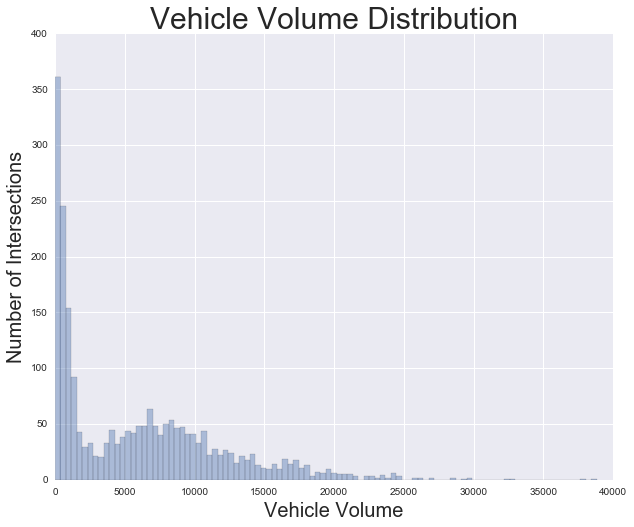

In [45]:
# vehicle volume distribution
fig, ax = plt.subplots(figsize =(10, 8))
sns.distplot(intersection_ped_df['8hr_vel_vol'].values, bins= 100, kde=False)
ax.set_xlabel('Vehicle Volume', fontsize = 20)
ax.set_ylabel('Number of Intersections', fontsize = 20)
ax.set_title('Vehicle Volume Distribution', fontsize = 30)

In [46]:
sorted_veh_df = intersection_ped_df.sort_values(by='8hr_vel_vol')
# bottom 20 intersections with the lowest vehicle volume
bottom20veh = sorted_veh_df[:20] 
# Top 20 intesections with the highest vehicle volume
top20veh = sorted_veh_df[-20:]

In [47]:
# 20 intersections with the lowest vehicle volume
bottom20veh

PX                main     midblock_route                        side1_route                side2_route   latitude  longitude  8hr_vel_vol  8hr_ped_vol
1470  1476         YORKDALE RD       335m EAST OF                        DUFFERIN ST                        NaN  43.728260 -79.453950          0.0      14052.0
1847  1871  SHERWAY GARDENS RD                NaN  GARDINER X W SHERWAY GARDENS RAMP                        NaN  43.613090 -79.552280          0.0       9713.0
1341  1344   LAKE SHORE BLVD W                NaN                BRITISH COLUMBIA RD                        NaN  43.631430 -79.429410          0.0      27298.0
756    759   VICTORIA PARK AVE                NaN           401 C E VICTORIA PR RAMP                        NaN  43.766940 -79.319180          0.0      35267.0
1678  1690       STEELES AVE E                NaN                PICKERING TOWN LINE                        NaN  43.855450 -79.170250          0.0      12685.0
922    925         RENFORTH DR                NaN                RENFORTH 427 S RAMP                        NaN  43.667630 -79.590775          0.0      24049.0
2128  2194         BAYVIEW AVE      620m SOUTH OF                         POTTERY RD             PRIVATE ACCESS  43.682889 -79.366120          0.0      16607.0
1771  1784   LAKE SHORE BLVD W  350m NORTHEAST OF                       PARK LAWN RD             PRIVATE ACCESS  43.626010 -79.479700          0.0      11273.0
2199  3011       OLD FINCH AVE       250m EAST OF                         SEWELLS RD                        NaN  43.825259 -79.196812          0.0       1081.0
175    177         BAYVIEW AVE                NaN                           RIVER ST                        NaN  43.665882 -79.357365          1.0      13720.0
2172  2240  WILLIAM R ALLEN RD                NaN                     PRIVATE ACCESS                        NaN  43.747990 -79.462420          1.0      32668.0
1131  1134     MARTIN GROVE RD                NaN            409 W MARTIN GROVE RAMP                        NaN  43.700072 -79.574769          4.0      15896.0
1736  1749          BRIMLEY RD      255m SOUTH OF                     SHEPPARD AVE E                        NaN  43.785444 -79.267174          5.0      13250.0
1920  1954       STEELES AVE E                NaN                         STAINES RD                        NaN  43.841040 -79.232240          6.0      11447.0
1509  1515    FAIRVIEW MALL DR                NaN           FAIRVIEW MALL 404 S RAMP             PRIVATE ACCESS  43.778654 -79.341798          6.0      17893.0
951    954      EGLINTON AVE W                NaN         27 401 427 EGLINTON E RAMP                        NaN  43.673944 -79.567555          8.0      30124.0
1358  1361          NEILSON RD                NaN            401 C W NEILSON RD RAMP  NEILSON RD S 401 C W RAMP  43.795031 -79.216562          9.0      19847.0
1998  2044        MCNICOLL AVE                NaN                    MORNINGSIDE AVE                 OASIS BLVD  43.827290 -79.234670         10.0       6239.0
1445  1451         YORKDALE RD                NaN          401 W ALLEN YORKDALE RAMP             PRIVATE ACCESS  43.727580 -79.449460         10.0      16633.0
165    167         BAYVIEW AVE                NaN                         NESBITT DR                        NaN  43.694104 -79.366284         12.0      15743.0

In [48]:
### Plot 20 intersections with lowest pedestrian volume on interactive Map
bottom20veh_map = folium.Map(location = [43.6532, -79.3832])
bottom20veh_map.save('bottom20veh.html')
marker_cluster_intersection = folium.MarkerCluster().add_to(bottom20veh_map)
for index, row in bottom20veh.iterrows():
    folium.Marker([row["latitude"],row["longitude"]]).add_to(marker_cluster_intersection )
bottom20veh_map.save('bottom20veh.html')
bottom20veh_map

In [49]:
# 20 intersections with the highest vehicle volume
top20veh

PX                main midblock_route      side1_route     side2_route   latitude  longitude   8hr_vel_vol   8hr_ped_vol
935    938      SHEPPARD AVE E            NaN       MCCOWAN RD             NaN  43.789640 -79.258830  24412.000000  12915.666667
451    453      EGLINTON AVE E            NaN        LESLIE ST             NaN  43.717030 -79.349900  24436.666667  12054.666667
645    648      SHEPPARD AVE E            NaN      BAYVIEW AVE             NaN  43.766624 -79.388044  24588.500000  28329.000000
84      86           AVENUE RD            NaN       BLOOR ST W             NaN  43.668685 -79.394119  24699.000000  19314.000000
66      68              BAY ST            NaN       COLLEGE ST             NaN  43.660814 -79.385857  24779.000000  17491.000000
38      40            BLOOR ST            NaN         YONGE ST             NaN  43.670229 -79.386767  25696.000000  15800.000000
741    744      SHEPPARD AVE E            NaN        LESLIE ST             NaN  43.771690 -79.364160  25908.333333  16089.000000
64      66         DUNDAS ST W            NaN           BAY ST             NaN  43.655721 -79.383734  26091.500000  27012.000000
1189  1192       STEELES AVE E            NaN       KENNEDY RD             NaN  43.823710 -79.307050  26327.666667  14031.000000
691    694          WARDEN AVE            NaN     ELLESMERE RD             NaN  43.761270 -79.300720  26963.666667  12421.333333
60      62              BAY ST            NaN    ADELAIDE ST W             NaN  43.649876 -79.380823  27086.000000  18630.000000
123    125            YONGE ST            NaN   SHEPPARD AVE E  SHEPPARD AVE W  43.761514 -79.410903  28602.333333  18604.333333
616    619       STEELES AVE W            NaN      DUFFERIN ST             NaN  43.787267 -79.470123  28657.666667  15355.000000
1403  1407  WILLIAM R ALLEN RD            NaN   SHEPPARD AVE W             NaN  43.750280 -79.463380  29123.000000  15855.666667
290   2312       STEELES AVE W            NaN        ALBION RD  REGIONAL RD 50  43.749850 -79.639290  29577.000000     19.000000
34      36            YONGE ST            NaN      DUNDAS ST E     DUNDAS ST W  43.656326 -79.380912  29631.000000  25565.000000
58      60              BAY ST            NaN  WELLINGTON ST W             NaN  43.647345 -79.379702  32319.000000  16188.000000
47      49            YONGE ST            NaN   EGLINTON AVE E  EGLINTON AVE W  43.706750 -79.398311  32728.000000  23270.000000
1        3           KING ST E            NaN        JARVIS ST             NaN  43.650461 -79.371924  37719.000000  17665.000000
62      64              BAY ST            NaN       QUEEN ST W             NaN  43.651890 -79.381698  38815.000000  19155.000000

In [50]:
### Plot 20 intersections with highest pedestrian volume on interactive Map
top20veh_map = folium.Map(location = [43.6532, -79.3832])
top20veh_map.save('top20veh.html')
marker_cluster_intersection = folium.MarkerCluster().add_to(top20veh_map)
for index, row in top20ped.iterrows():
    folium.Marker([row["latitude"],row["longitude"]]).add_to(marker_cluster_intersection )
top20veh_map.save('top20veh.html')
top20veh_map

### 3.2 Intersections and Cultural Facilities Geographic Distribution Plot
<a id = '3.2'></a>

In this section, we will show the geograhic distributions of intersections and facilites using geographic coordinates

#### 3.2.1 Geographic Distribution of Intersections 

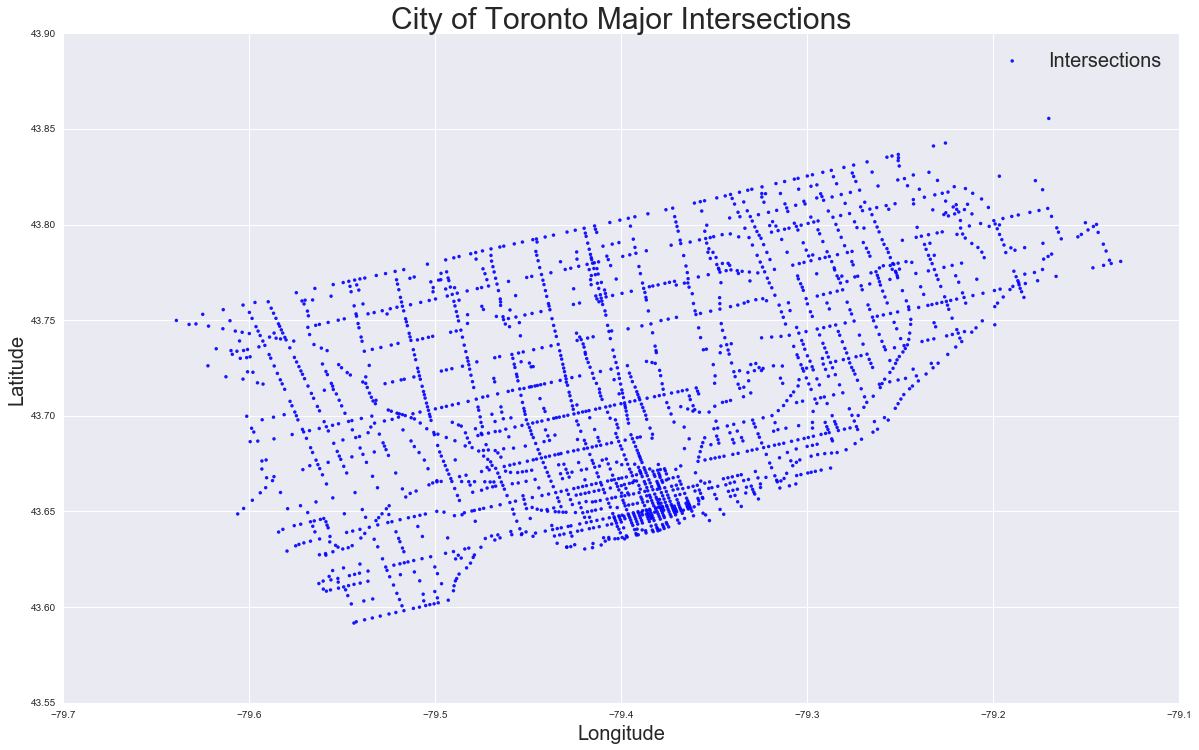

In [51]:
# plot intersections using their geographic coordinates
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'], intersection_ped_df['latitude'], 
                                  c='b', edgecolor='None', alpha=0.9, s=12)
ax.set_title('City of Toronto Major Intersections', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize =20)
ax.legend([intersection_scatter], ['Intersections'], loc='upper right', fontsize = 20)
plt.show()

From the graph, we can see the shape of City of Toronto and some of the main streets.  
**Note**: For future imporvement, we can add the City of Toronto basemap to the plot for better visualization

In [52]:
### Plot intersections on interactive Map
intersection_map = folium.Map(location = [43.6532, -79.3832])
intersection_map.save('intersections.html')
marker_cluster_intersection = folium.MarkerCluster().add_to(intersection_map)
for index, row in intersection_ped_df.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(marker_cluster_intersection )
intersection_map.save('intersections.html')
intersection_map

The interactive map gives up more context about each intersection

#### 3.2.2 Geographic Distribution of Cultural Facilities

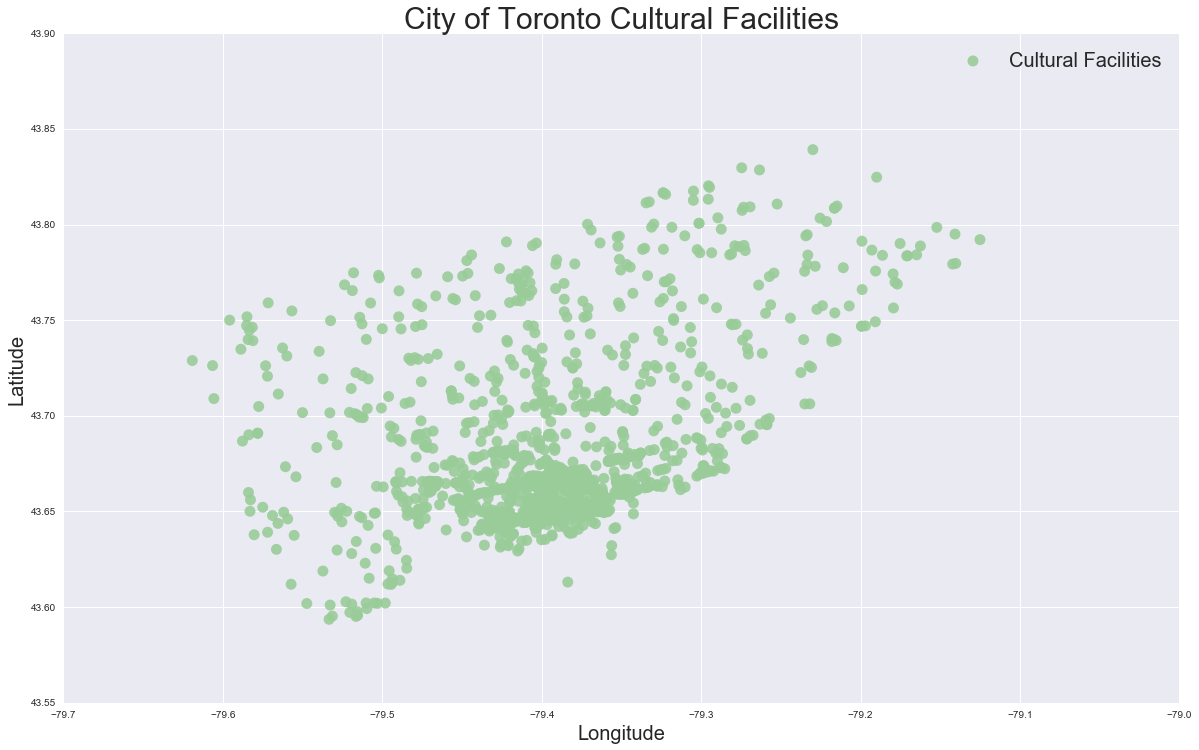

In [53]:
# plot Cultural facilities distribution based on
# geographic coordinates
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'], 
                              c='#99cc99', edgecolor='None', alpha=0.9, s=120)
ax.set_title('City of Toronto Cultural Facilities', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize =20)
ax.legend([facility_scatter], ['Cultural Facilities'], loc='upper right', fontsize = 20)
plt.show()

It is no surprise that cultural facilities are condensed in downtown area of City of Toronto.

Plot Cultural Facilities on Interactive Map

In [54]:
# Cultural Facilities on Interactive Map
facility_map = folium.Map(location = [43.6532, -79.3832])
facility_map.save('facilities.html')
marker_cluster_facility = folium.MarkerCluster().add_to(facility_map)
for index, row in facility_df.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(marker_cluster_facility)
facility_map.save('facilities.html')
facility_map

### 3.3 Clustering Facilities Using DBSCAN Algorithm
<a id = '3.3'></a>

We first tried [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan) algorithm in `scikit-learn` for clustering. DBSCAN is base on the paper:

* “A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise” Ester, M., H. P. Kriegel, J. Sander, and X. Xu, In Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining, Portland, OR, AAAI Press, pp. 226–231. 1996

This algorithm is aimed for spatial data, which might be a good fit for our case.

The following is a description of DBSCAN algorithm from sklearn:

>The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

DBSCAN algorithm clusters dataset based on two parameters:

 * **eps** - The max distance between neighbour points to be considerted in a cluster

 *  **min_samples** - the minimum cluster size. If it is set to 1, it means every data point will be assigned to either a cluster or form its own cluster of 1 data point. If `min_sample` is set to be larger than one, then cluster with size less than min_sample will be considered as noise.

The scikit-learn DBSCAN haversine distance metric requires data in the form of [latitude, longitude] and both inputs and outputs are in units of radians.


#### Choose Parameters for DBSCAN clustering algorithm

Since in our facility dataset, we need to consider all facilities, we don't want any of them to be classified as noise, so we set `min_samples`=1. Now our clustering will depend on a proper `eps` value.

Let's try esp = 1.5, 1.0, 0.7 (km)

Note that `eps` need to be converted to radians for use by harversine

In [55]:
# define the number of kilometers in one radiation
# which will be used to convert esp from km to radiation
kms_per_rad = 6371.0088

In [56]:
# define a function to calculate the geographic coordinate 
# centroid of a cluster of geographic points
# it will be used later to calculate the centroids of DBSCAN cluster
# because Scikit-learn DBSCAN cluster algorithm does not calculate centroid
def get_centroid(cluster):
  """calculate the centroid of a cluster of geographic coordinate points
  Args:
    cluster: cluster coordinates, nx2 array-like (array, list of lists, etc) 
    n is the number of coordinate points(latitude, longitude)in the cluster.
  Return:
    centroid: numpy array, geometry centroid of the cluster
    
  """
  cluster_ary = np.asarray(cluster)
  centroid = cluster_ary.mean(axis = 0)
  return centroid

# testing get_centroid function
test_cluster= [[ 43.70487299, -79.57753802], 
               [ 43.71138367, -79.56524418],
               [ 43.72616079, -79.57319998],
               [ 43.73547907, -79.56258364],
               [ 43.72070325, -79.57202018],
               [ 43.73126031, -79.5598719 ]]
test_centroid = get_centroid(test_cluster)
print test_centroid
print type(test_centroid)

[ 43.72164335 -79.56840965]
<type 'numpy.ndarray'>


#### 3.3.1 DBSCAN Clustering with eps = 1.5

In [57]:
# convert eps to radians for use by haversine
epsilon = 1.5/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
fac_coords = facility_df.as_matrix(columns = ['latitude', 'longitude'])

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(fac_coords)))
fac_cluster_labels = dbsc.labels_

# get the number of clusters
num_clusters = len(set(dbsc.labels_))

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(facility_df), num_clusters, 100*(1 - float(num_clusters) / len(facility_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(fac_coords, fac_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([fac_coords[fac_cluster_labels==n] for n in range(num_clusters)])

Clustered 1,397 points down to 20 clusters, for 98.6% compression in 0.10 seconds
Silhouette coefficient: -0.165


In [58]:
# get centroid of each cluster
fac_centroids = dbsc_clusters.map(get_centroid)
# unzip the list of centroid points (lat, lon) tuples into separate lat and lon lists
cent_lats, cent_lons = zip(*fac_centroids)
# from these lats/lons create a new df of one representative point for eac cluster
centroids_df = pd.DataFrame({'longitude':cent_lons, 'latitude':cent_lats})

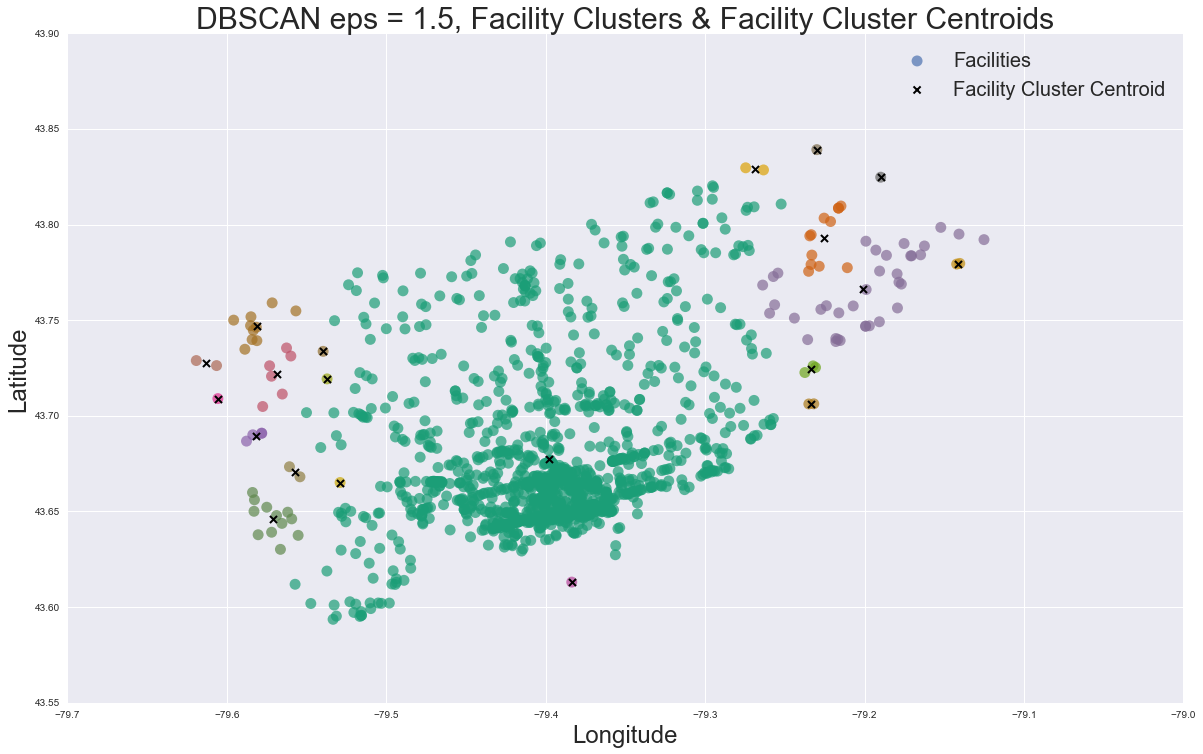

In [59]:
# Plot the facility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'], 
                              c=fac_cluster_labels, cmap = cm.Dark2, 
                              edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(centroids_df['longitude'], centroids_df['latitude'], 
                              marker='x', linewidths=2, c='k', s=50)
ax.set_title('DBSCAN eps = 1.5, Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter],
          ['Facilities', 'Facility Cluster Centroid'], 
          loc='upper right', fontsize = 20)
plt.show()

As we can see when we set eps = 1.5, the DBSCAN algorithm groups the cultural facilities into 20 clusters based on their geographic coordinates. The figure further proved the concept that:
> "DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped."

Obviously, 20 cluster is not enough. We need a lot more than 20 intersections to place map. Let's adjust the `eps` parameter and see what result we can get.

#### 3.3.2 DBSCAN Clustering with eps = 0.7

In [60]:
# convert eps to radians for use by haversine
epsilon = 0.7/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
fac_coords = facility_df.as_matrix(columns = ['latitude', 'longitude'])

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(fac_coords)))
fac_cluster_labels = dbsc.labels_

# get the number of clusters
num_clusters = len(set(dbsc.labels_))

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(facility_df), num_clusters, 100*(1 - float(num_clusters) / len(facility_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(fac_coords, fac_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([fac_coords[fac_cluster_labels==n] for n in range(num_clusters)])

Clustered 1,397 points down to 185 clusters, for 86.8% compression in 0.06 seconds
Silhouette coefficient: 0.004


In [61]:
# get centroid of each cluster
fac_centroids = dbsc_clusters.map(get_centroid)
# unzip the list of centroid points (lat, lon) tuples into separate lat and lon lists
cent_lats, cent_lons = zip(*fac_centroids)
# from these lats/lons create a new df of one representative point for eac cluster
centroids_df = pd.DataFrame({'longitude':cent_lons, 'latitude':cent_lats})

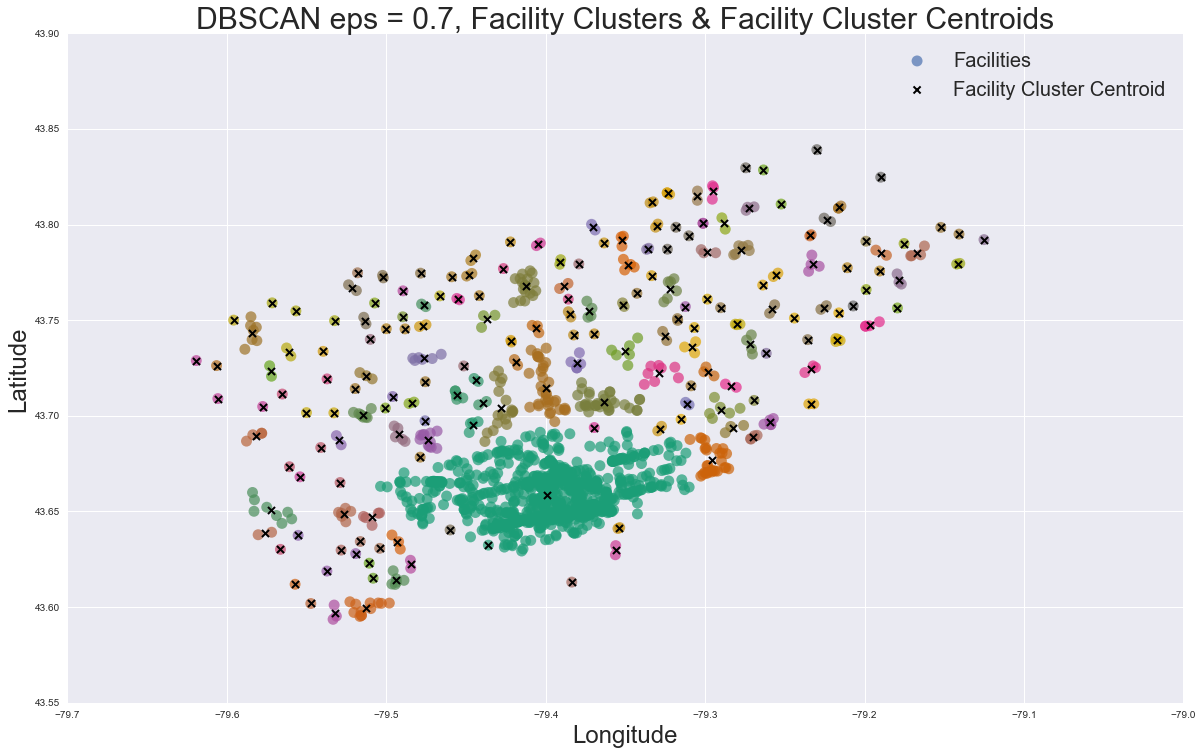

In [62]:
# Plot the facility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'],
                              c=fac_cluster_labels, cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(centroids_df['longitude'], centroids_df['latitude'],
                              marker='x', linewidths=2, c='k', s=50)
ax.set_title('DBSCAN eps = 0.7, Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter], ['Facilities', 'Facility Cluster Centroid'],
          loc='upper right', fontsize = 20)
plt.show()

When we set eps = 0.7, the DBSCAN algorithm group the facilities into 185 clusters. From the plot we can clearly see that the core of downtown is a huge cluster, accounting for more than half of all facilities, while most other cluster only has one facility. This is not a resonable clustering that we can base on to put maps. Let's try eps = 1.0 km and see if we can get a reasonable result.

#### 3.3.3 DBSCAN Clustering with eps = 1.0 km

In [63]:
# convert eps to radians for use by haversine
epsilon = 1.0/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
fac_coords = facility_df.as_matrix(columns = ['latitude', 'longitude'])

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(fac_coords)))
fac_cluster_labels = dbsc.labels_

# get the number of clusters
num_clusters = len(set(dbsc.labels_))

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(facility_df), num_clusters, 100*(1 - float(num_clusters) / len(facility_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(fac_coords, fac_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([fac_coords[fac_cluster_labels==n] for n in range(num_clusters)])

Clustered 1,397 points down to 93 clusters, for 93.3% compression in 0.06 seconds
Silhouette coefficient: -0.028


In [64]:
# get centroid of each cluster
fac_centroids = dbsc_clusters.map(get_centroid)
# unzip the list of centroid points (lat, lon) tuples into separate lat and lon lists
cent_lats, cent_lons = zip(*fac_centroids)
# from these lats/lons create a new df of one representative point for eac cluster
centroids_df = pd.DataFrame({'longitude':cent_lons, 'latitude':cent_lats})

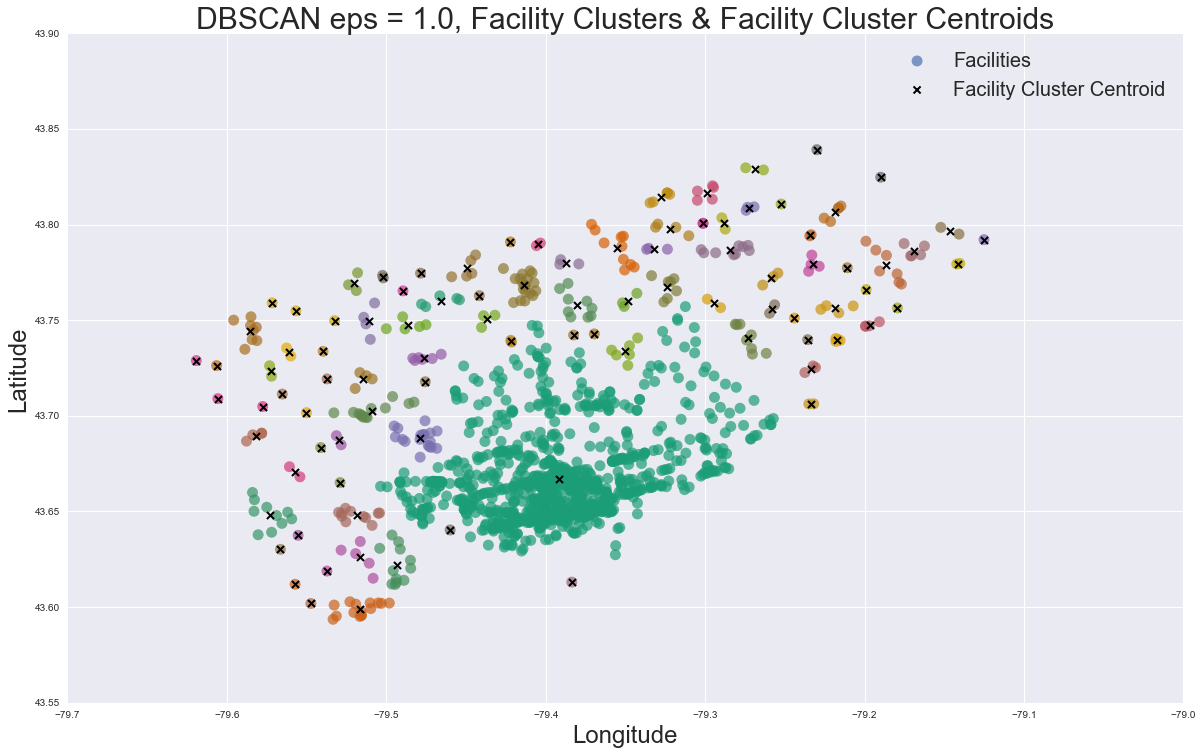

In [65]:
# Plot the facility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'], facility_df['latitude'],c=fac_cluster_labels,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(centroids_df['longitude'], centroids_df['latitude'], 
                              marker='x', linewidths=2, c='k', s=50)
ax.set_title('DBSCAN eps = 1.0, Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)
ax.legend([facility_scatter, centroid_scatter], ['Facilities', 'Facility Cluster Centroid'],
          loc='upper right', fontsize = 20)
plt.show()

eps = 1.0. the DBSCAN algorithm divided the facilities into 93 clusters. Again, downtown and middle down facilites are in the same huge cluster, and other facilities are rather nicely grouped. Based on these findings we learned that DBSCAN alone is not good enough for our needs, but it can be used to select the areas where facilities are dense and help implement a phase-wise plan for rolling out maps throughout the City of Toronto.

## 3.4  DBSCAN for Phase-wise Implementation
<a id = '3.4'></a>

The citywide roll-out of the map placement will be implemented through a 3-year plan as shown in the following map. 

* Year 1: Complete TO360 roll-out within Core of Downtown Toronto
* Year 2: Focused roll-out of TO360 map in and around main streets, BIAs and transit hubs
* Year 3: Citywide roll-out of TO360 map

![Phases](./images/phase_implementation.png)

DBSCAN algorithm can help to select the facilities for each phase of implementation.

### 3.4.1 Downtown and Mainstreet Facilities

In [66]:
# cluster labels based on eps = 1.0
fac_cluster_labels

array([ 0,  0,  0, ..., 89, 25, 51], dtype=int64)

In [67]:
# add cluster label column to all facilites
labeled_facility_df = facility_df
labeled_facility_df['label'] = fac_cluster_labels
labeled_facility_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191      0
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194      0
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195      0
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196      0
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199      0

In [68]:
labeled_facility_df.groupby('label').count()['add_num']

label
0     1064
1        5
2       10
3       12
4        9
5       13
6        8
7        7
8       20
9        4
10       8
11       5
12       1
13      10
14       1
15      15
16       2
17       7
18       1
19       4
20      11
21       5
22       1
23       9
24       3
25       4
26      18
27       3
28       1
29       3
      ... 
63       1
64       1
65       1
66       2
67       1
68       4
69       2
70       1
71       4
72       2
73       3
74       5
75       1
76       2
77       4
78       1
79       1
80       1
81       1
82       5
83       1
84       1
85       2
86       1
87       2
88       1
89       2
90       1
91       1
92       1
Name: add_num, dtype: int64

Downtown cluster is very condensed, it includes 1064 facilities out of the total 1397 facilities.
Let's extract Downtown facilities basen on previous DBSCAN clustering(eps = 1.0 km)

In [69]:
downtown_fac_df = labeled_facility_df[labeled_facility_df['label']==0]
downtown_fac_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191      0
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194      0
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195      0
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196      0
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199      0

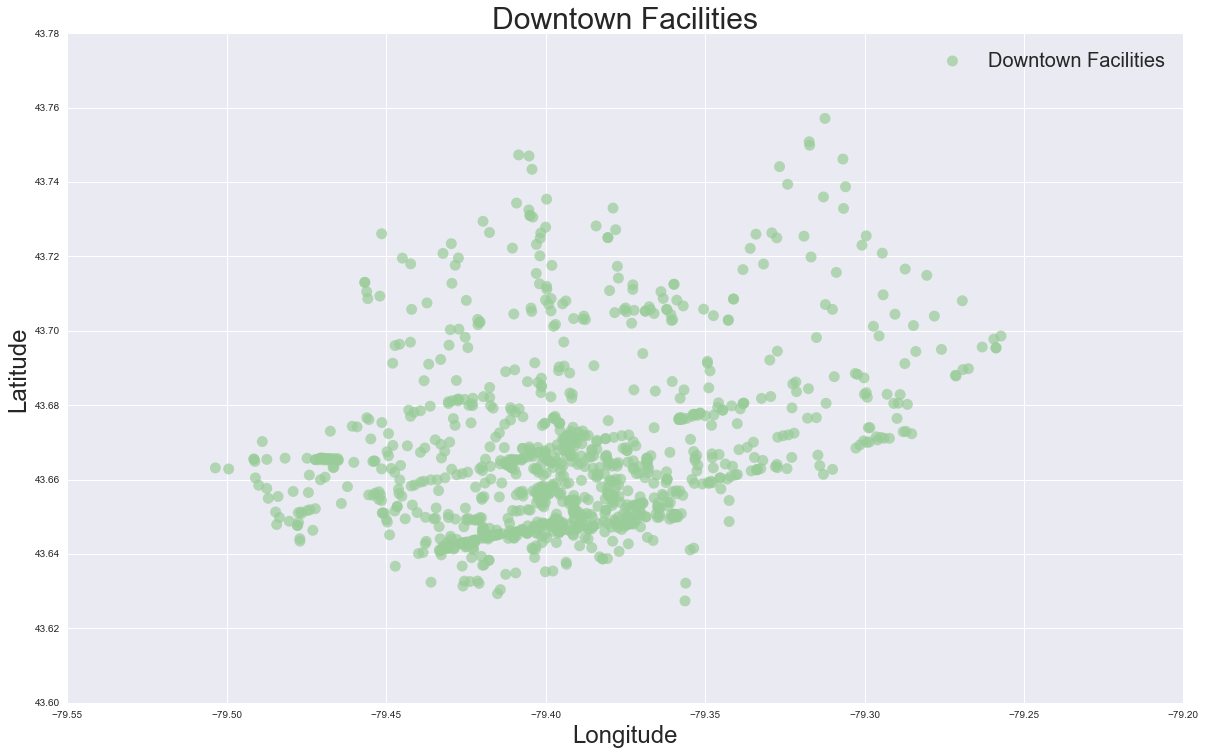

In [70]:
# Plot downtown facilities
fig, ax = plt.subplots(figsize=[20, 12])
downtown_fac_scatter = ax.scatter(downtown_fac_df['longitude'], downtown_fac_df['latitude'],
                                  c='#99cc99', edgecolor='None', alpha=0.7, s=120)
ax.set_title('Downtown Facilities', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)
ax.legend([downtown_fac_scatter], ['Downtown Facilities'],
          loc='upper right', fontsize = 20)
plt.show()

### 3.4.2 Extract Core Downtown Facilities
Set `eps = 0.4 km` to further clustering downtown facilities

In [71]:
# convert eps to radians for use by haversine
epsilon = 0.4/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
dt_fac_coords = downtown_fac_df.as_matrix(columns = ['latitude', 'longitude'])

start_time = time.time()
dbsc_dt = (DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine')
           .fit(np.radians(dt_fac_coords)))
dt_labels = dbsc_dt.labels_

# get the number of clusters
num_clusters = len(set(dbsc_dt.labels_))

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(downtown_fac_df), num_clusters, 100*(1 - float(num_clusters) / len(downtown_fac_df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(dt_fac_coords, dt_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dt_clusters = pd.Series([dt_fac_coords[dt_labels==n] for n in range(num_clusters)])

Clustered 1,064 points down to 135 clusters, for 87.3% compression in 0.03 seconds
Silhouette coefficient: -0.144


In [72]:
# get centroid of each cluster
dt_fac_centroids = dt_clusters.map(get_centroid)
# unzip the list of centroid points (lat, lon) tuples into separate lat and lon lists
cent_lats, cent_lons = zip(*dt_fac_centroids)
# from these lats/lons create a new df of one representative point for eac cluster
dt_centroids_df = pd.DataFrame({'longitude':cent_lons, 'latitude':cent_lats})

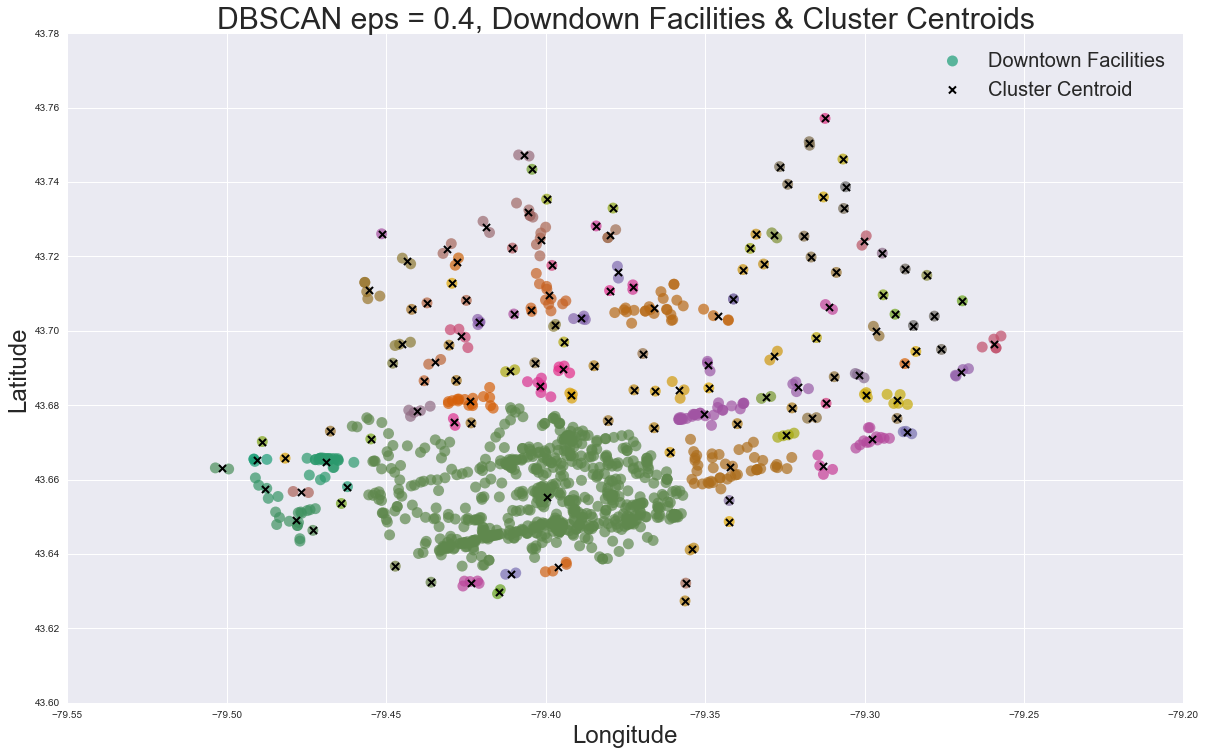

In [73]:
# Plot the downtown facility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
dt_fac_scatter = ax.scatter(downtown_fac_df['longitude'], downtown_fac_df['latitude'],c=dt_labels,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
dt_centroid_scatter = ax.scatter(dt_centroids_df['longitude'], dt_centroids_df['latitude'], 
                              marker='x', linewidths=2, c='k', s=50)
ax.set_title('DBSCAN eps = 0.4, Downdown Facilities & Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)
ax.legend([facility_scatter, centroid_scatter], ['Downtown Facilities', 'Cluster Centroid'],
          loc='upper right', fontsize = 20)
plt.show()

In [74]:
# add cluster label column to downtown facilities
labeled_downtown_fac_df = downtown_fac_df.drop(['label'], axis=1)
labeled_downtown_fac_df['label'] = dt_labels
labeled_downtown_fac_df

add_num            lf_name                 address postal_cd     city           x            y  longitude   latitude                                           fac_name    ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
0       3465        Dundas St W        3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                                       Club Hispano           NaN            1           1           0        0          0         0  Owned by others       191      0
1        181       Glenlake Ave        181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                             Keele Community Centre           NaN            0           0           0        0          1         0       City Owned       194      1
2        288     Humberside Ave      288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649             St. Johns West Toronto Anglican Church           NaN            1           0           0        0          1         0  Owned by others       195      2
3        238            Jane St             238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                               Art Works Art School           NaN            0           1           0        0          0         0  Owned by others       196      3
4         95        Lavinia Ave          95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                           Swansea Memorial Library           NaN            0           0           0        1          0         0       City Owned       199      4
5       4066      Old Dundas St      4066 Old Dundas St   M6S 2R6  Toronto  304493.023  4835688.812 -79.503611  43.663150                                      Lambton House           NaN            0           1           1        0          1         1       City Owned       200      5
6        396        Pacific Ave         396 Pacific Ave   M6P 2R1  Toronto  307304.397  4835926.822 -79.468753  43.665289       The Junction Business Improvement Area (BIA)     Suite 205            1           0           0        0          0         0  Owned by others       201      2
7        280         Quebec Ave          280 Quebec Ave   M6P 2V3  Toronto  307151.945  4835333.803 -79.470646  43.659951      Humberside Collegiate Institute (Lismer Hall)           NaN            1           1           1        0          1         0  Owned by others       202      2
8         15         Waller Ave           15 Waller Ave   M6S 4Z9  Toronto  306630.380  4833574.020 -79.477119  43.644112                Swansea Community Recreation Centre           NaN            1           0           0        0          1         0       City Owned       204      4
9        207     Windermere Ave      207 Windermere Ave   M6S 3J9  Toronto  306632.849  4833502.245 -79.477088  43.643466                              Swansea Public School           NaN            1           1           1        0          1         0  Owned by others       205      4
10         4    Morningside Ave       4 Morningside Ave   M6S 1C2  Toronto  306959.670  4833823.589 -79.473036  43.646358        Morningside - High Park Presbyterian Church           NaN            1           0           0        0          1         0  Owned by others       208      6
11      2232         Bloor St W         2232 Bloor St W   M6S 1N6  Toronto  306652.233  4834370.557 -79.476845  43.651282                        Bread and Roses Bakery Caf�           NaN            0           1           0        0          0         0  Owned by others       212      4
12       365            Jane St             365 Jane St   M6S 3Z3  Toronto  305793.129  4835077.590 -79.487493  43.657648                             Coco Organic Chocolate           NaN            0           1           0        0          0         0  Owned 

In [75]:
# check which label correspond to core downtown cluster
labeled_downtown_fac_df.groupby('label').count()['add_num']

label
0        4
1        1
2       25
3        5
4       15
5        2
6        1
7      655
8        1
9        1
10       1
11       3
12       2
13       5
14       1
15      42
16      22
17       4
18       2
19       1
20      16
21       4
22       2
23      10
24       1
25       2
26       1
27       1
28       5
29       2
      ... 
105      1
106      1
107      1
108      2
109      1
110      1
111      1
112      1
113      1
114      1
115      1
116      1
117      1
118      1
119      1
120      2
121      1
122      2
123      1
124      1
125      1
126      1
127      2
128      1
129      1
130      1
131      1
132      1
133      1
134      1
Name: add_num, dtype: int64

Core downtown cluster's label is 7, and Core downtown contains 655 facilities. Now, let's extract the core downtown facilities

In [76]:
# facilities in the core of downtown
downtown_core_fac_df = labeled_downtown_fac_df[labeled_downtown_fac_df['label']==7]
downtown_core_fac_df

add_num           lf_name               address postal_cd     city           x            y  longitude   latitude                                           fac_name  ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
16      1515        Bloor St W       1515 Bloor St W   M6P 1A3  Toronto  308671.405  4834880.699 -79.451811  43.655866  Bishop Marrocco/Thomas Merton Catholic Seconda...         NaN            1           0           0        0          1         0  Owned by others       224      7
17      1573        Bloor St W       1573 Bloor St W   M6P 1A6  Toronto  308482.599  4834870.267 -79.454152  43.655773                         Lithuanian Community House         NaN            1           0           0        0          1         0  Owned by others       226      7
18        77         Brock Ave          77 Brock Ave   M6K 2L3  Toronto  310180.573  4833571.884 -79.433114  43.644077                           The Japanese Paper Place         NaN            0           1           0        0          0         0  Owned by others       229      7
19       186         Cowan Ave         186 Cowan Ave   M6K 2N6  Toronto  310209.516  4833091.607 -79.432760  43.639753      St. John's National Polish Catholic Cathedral         NaN            0           0           0        0          1         0  Owned by others       230      7
20       376       Dufferin St       376 Dufferin St   M6K 1Z8  Toronto  310544.094  4833302.056 -79.428611  43.641645                                   Unit 102 Theatre         NaN            1           0           0        0          0         0  Owned by others       234      7
21      2261       Dundas St W      2261 Dundas St W   M6R 1X6  Toronto  308628.232  4834749.364 -79.452347  43.654684                                        Hugh's Room         NaN            1           0           0        0          0         0  Owned by others       237      7
22      2340       Dundas St W      2340 Dundas St W   M6P 4A9  Toronto  308634.118  4834975.935 -79.452273  43.656724                                   Trebas Institute         NaN            0           0           1        0          0         0  Owned by others       238      7
25        75     Lansdowne Ave      75 Lansdowne Ave       NaN  Toronto  309829.411  4833496.928 -79.437467  43.643404               Parkdale Community Recreation Centre         NaN            0           0           0        0          1         0    City operated       244      7
26        21        Morrow Ave         21 Morrow Ave   M6R 2H9  Toronto  309094.851  4834538.147 -79.446564  43.652781                          Christopher Cutts Gallery         NaN            0           1           0        0          0         0  Owned by others       246      7
27      1255        Queen St W       1255 Queen St W   M6K 1L5  Toronto  310366.185  4833279.753 -79.430816  43.641446                                      Stone's Place         NaN            1           0           0        0          0         0  Owned by others       249      7
28      1266        Queen St W       1266 Queen St W   M6K 1L3  Toronto  310461.414  4833392.043 -79.429635  43.642456                                 Goodfellas Gallery         NaN            0           1           0        0          0         0  Owned by others       250      7
29       345      Sorauren Ave      345 Sorauren Ave   M6R 2G5  Toronto  309295.802  4834170.210 -79.444076  43.649468                      Gallery 345 (Circuit Gallery)         NaN            1           1           0        0          1         0  Owned by others       265      7
30        11    Strickland Ave     11 Strickland Ave   M6K 3E6  Toronto  310367.922  4833468.740 -79.430793  43.643147                                David Scott Gallery         NaN            0           1           0        0          0         0  Owned by others       266      7
38      1450       Dundas St W      1450 Du

There are 655 facilities in the core of downtown

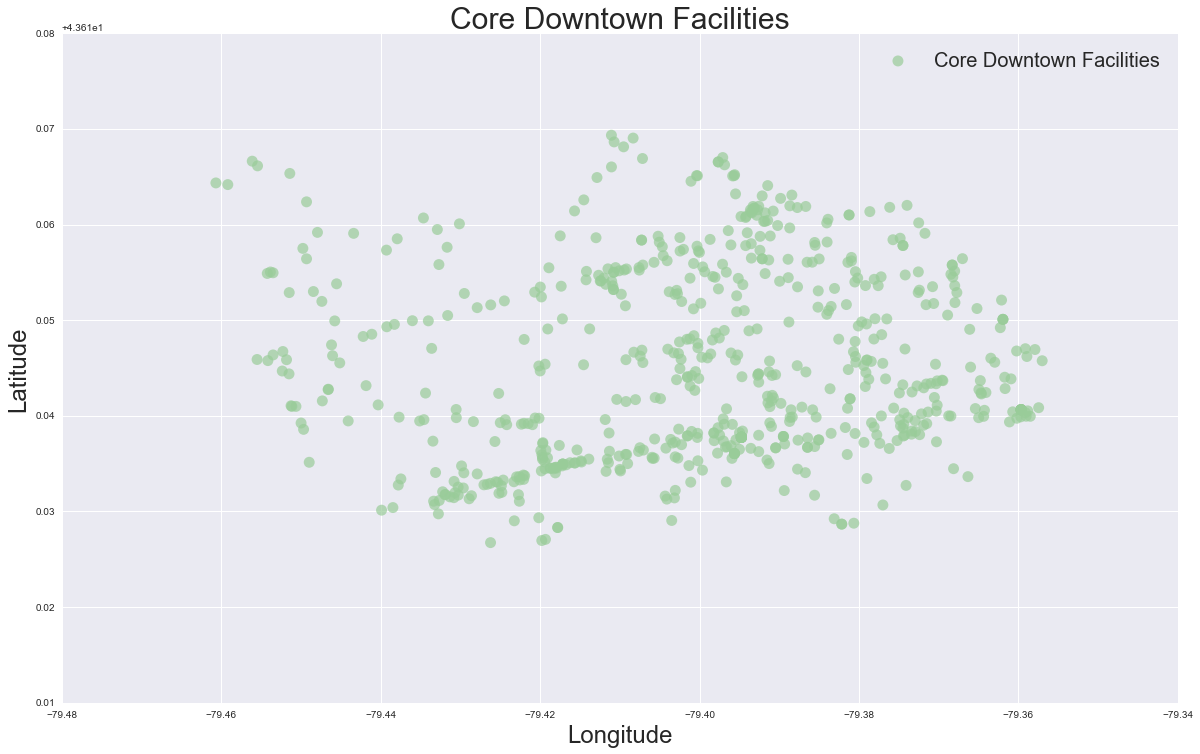

In [77]:
# Plot core downtown facilities
fig, ax = plt.subplots(figsize=[20, 12])
downtown_core_fac_scatter = ax.scatter(downtown_core_fac_df['longitude'], downtown_core_fac_df['latitude'],
                                  c='#99cc99', edgecolor='None', alpha=0.7, s=120)
ax.set_title('Core Downtown Facilities', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)
ax.legend([downtown_fac_scatter], ['Core Downtown Facilities'],
          loc='upper right', fontsize = 20)
plt.show()

Now, we have three groups of facilities: core downtown facilities, downtown and main streets facilities, and out core facilities. With these three groups of facilities, we can implement the 3 year phase-wise plan for map roll-out. For each group of facilites we can then use KMeans clustering algorithm to further clustering them into small groups and then we can put a map near the centroid of each cluster of facilities.

### 3.5 Clustering Facilities Using KMeans Algorithm
<a id = '3.5'></a>

In this section, we use KMeans clustering algorithm to group cultural facilities according to their geographic coordinates.

**Note**  
Here we apply KMeans clustering to the entire facility dataset to get a general idea of how KMeans algorithm works for our problem.

#### 3.5.1 KMeans Clustering with 200 Clusters

In [78]:
# use scikit-learn KMeans algorithm
n_clusters = 200
fac_coords = facility_df.as_matrix(columns=['latitude', 'longitude'])
KM200_model = KMeans(n_clusters = n_clusters)
KM200_model.fit(fac_coords)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=200, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [79]:
# turn the clusters in to a pandas series, where each element is a cluster of points
KM200_clusters = pd.Series([fac_coords[KM200_model.labels_==n] for n in range(n_clusters )])

# centroids of 200 clusters
fac200_centroids = KM200_model.cluster_centers_

# Labels
KM200_label = KM200_model.labels_

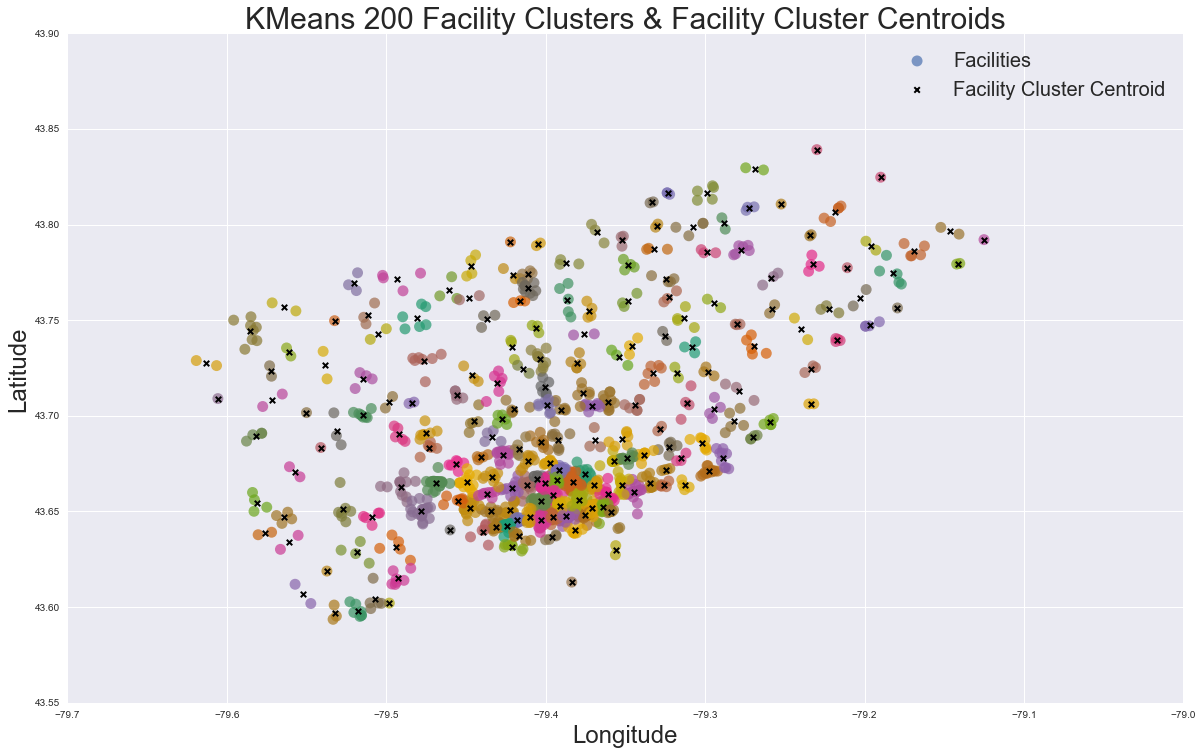

In [80]:
# Plot acility clusters and cluster centroid
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM200_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(fac200_centroids[:,1], fac200_centroids[:,0], marker='x', linewidths=2, c='k', s=30)
ax.set_title('KMeans 200 Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter], ['Facilities', 'Facility Cluster Centroid'], loc='upper right', fontsize = 20)
plt.show()

From the above plot we can see that 200 clusters might not be enough because the distance a map needs to cover is too long.

In [81]:
# Add cluster labels to facility_df dataframe
labeled_KM200_facility_df = facility_df
labeled_KM200_facility_df = facility_df
labeled_KM200_facility_df['label'] = KM200_label
labeled_KM200_facility_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191     49
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194     31
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195      9
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196     49
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199     52

In [82]:
labeled_KM200_facility_df.groupby('label').count()[['add_num', 'address']].describe()

add_num     address
count  200.000000  200.000000
mean     6.985000    6.985000
std      7.140005    7.140005
min      1.000000    1.000000
25%      3.000000    3.000000
50%      4.000000    4.000000
75%      8.000000    8.000000
max     48.000000   48.000000

The smallest cluster has 1 facility, the largest clusters contains 46 facilities

#### 3.5.2 KMeans Clustering with 300 Clusters
Let's increase the number of clusters to 300

In [83]:
n_clusters = 300
fac_coords = facility_df.as_matrix(columns=['latitude', 'longitude'])
KM300_model = KMeans(n_clusters =n_clusters)
KM300_model.fit(fac_coords)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=300, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [84]:
# turn the clusters in to a pandas series, where each element is a cluster of points
KM300_clusters = pd.Series([fac_coords[KM300_model.labels_==n] for n in range(n_clusters )])

# centroids of 200 clusters
fac300_centroids = KM300_model.cluster_centers_

# Labels
KM300_label = KM300_model.labels_

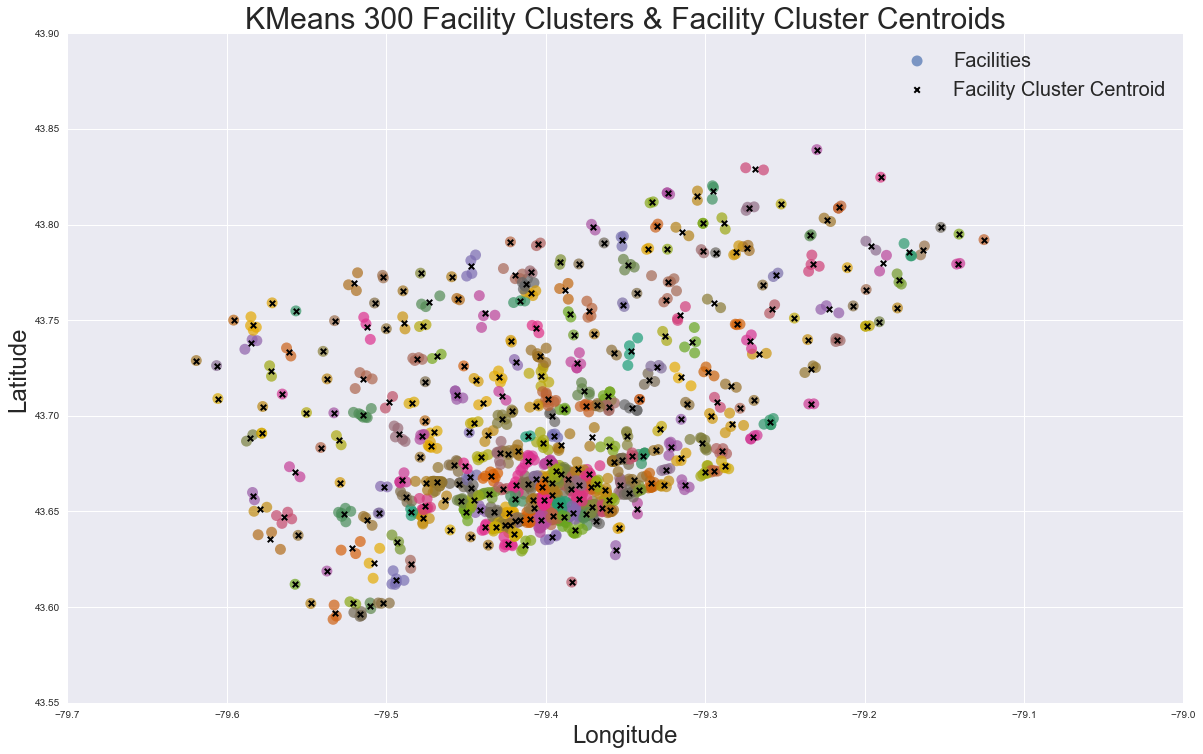

In [85]:
# Plot the facility clusters and cluster centroids
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM300_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
centroid_scatter = ax.scatter(fac300_centroids[:,1], fac300_centroids[:,0], 
                              marker='x', linewidths=2, c='k', s=30)
ax.set_title('KMeans 300 Facility Clusters & Facility Cluster Centroids', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([facility_scatter, centroid_scatter],
          ['Facilities', 'Facility Cluster Centroid'],
          loc='upper right', fontsize = 20)
plt.show()

In [86]:
# Plot facilities and facility cluster centroids on interactive map
facility_centroid_map = folium.Map(location = [43.6532, -79.3832])
facility_centroid_map.save('facility_centroids.html')

# Add markers of facilities
facility_cluster = folium.MarkerCluster().add_to(facility_centroid_map)
for index, row in facility_df.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(facility_cluster)    
    
# Add markers of clusters centroids
centroid_cluster = folium.MarkerCluster().add_to(facility_centroid_map)
for index, row in centroids_df.iterrows():
    folium.RegularPolygonMarker([row['latitude'], row['longitude']],
                 fill_color='#769d96', number_of_sides=8, radius=6, popup='cluster centroid').add_to(centroid_cluster)

facility_centroid_map.save('facility_centroids.html')
facility_centroid_map

In [87]:
# Add cluster labels to facility_df dataframe
labeled_KM300_facility_df = facility_df
labeled_KM300_facility_df = facility_df
labeled_KM300_facility_df['label'] = KM300_label
labeled_KM300_facility_df.head()

add_num         lf_name             address postal_cd     city           x            y  longitude   latitude                                fac_name ste_flr_un  performance  exhbvisart  scrn_based  library  multipurp  heritage        ownership  objectID  label
0    3465     Dundas St W    3465 Dundas St W   M6S 2S5  Toronto  305795.585  4835942.551 -79.487461  43.665434                            Club Hispano        NaN            1           1           0        0          0         0  Owned by others       191    118
1     181    Glenlake Ave    181 Glenlake Ave   M6P 4B6  Toronto  307834.850  4835127.684 -79.462181  43.658093                  Keele Community Centre        NaN            0           0           0        0          1         0       City Owned       194    244
2     288  Humberside Ave  288 Humberside Ave   M6P 1L5  Toronto  307268.847  4835411.316 -79.469196  43.660649  St. Johns West Toronto Anglican Church        NaN            1           0           0        0          1         0  Owned by others       195     28
3     238         Jane St         238 Jane St   M6S 3Z1  Toronto  305831.038  4834780.388 -79.487021  43.654964                    Art Works Art School        NaN            0           1           0        0          0         0  Owned by others       196    282
4      95     Lavinia Ave      95 Lavinia Ave   M6S 3H9  Toronto  306568.733  4833967.983 -79.477882  43.647658                Swansea Memorial Library        NaN            0           0           0        1          0         0       City Owned       199    235

In [88]:
labeled_KM300_facility_df.groupby('label').count()[['add_num', 'address']].describe()

add_num     address
count  300.000000  300.000000
mean     4.656667    4.656667
std      5.144610    5.144610
min      1.000000    1.000000
25%      2.000000    2.000000
50%      3.000000    3.000000
75%      5.000000    5.000000
max     46.000000   46.000000

The smallest cluster has 1 facility, the largest cluster has 43 facility.

We will use 300 clusters as the prototype for later selection of intersections for map placement.

## 4. Map Placement Based on Facility Clustering
<a id = '4'></a>

Now we have 300 facilities clusters and their centroids, our goal is to find an appropriate intersection to place map for each facility cluster as shown in the following plot. 

We compared two cases:  
**Case 1**: Select the intersection that is closest to the centroid of a cluster  
**Case 2**: Select the three closest intersections to  the centroid of a cluster, then among the three the closest intersections, we select the one with the highest pedestrian volume.

**KDTree Algorithm**   
To find the closest intersection to a cluster centroid, we will use KDTree algorithm.

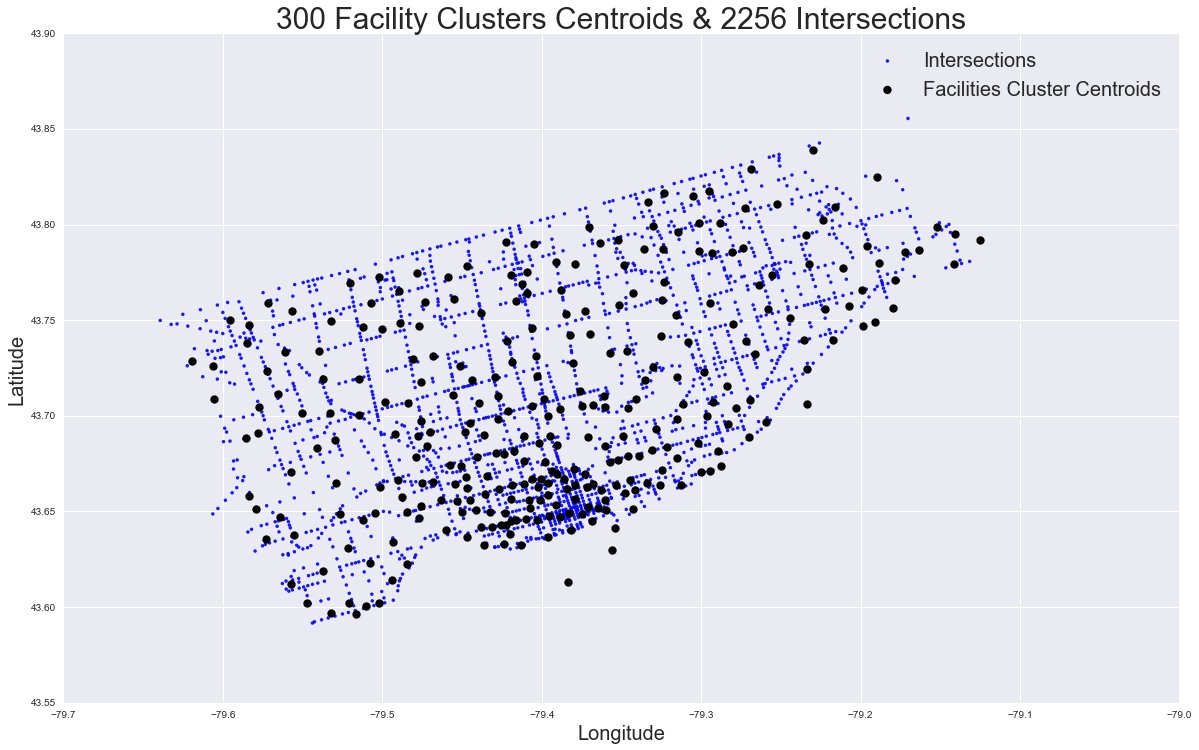

In [89]:
# plot facility cluster centroids and intersections
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'],
                                  intersection_ped_df['latitude'],
                                  c='b', edgecolor='None', alpha=0.9, s=12)
KM300_centroid_scatter = ax.scatter(fac300_centroids[:,1], fac300_centroids[:,0], 
                                    linewidths=2, c='k', s=40)
ax.set_title('300 Facility Clusters Centroids & 2256 Intersections', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize =20)
ax.legend([intersection_scatter, KM300_centroid_scatter], 
          ['Intersections', 'Facilities Cluster Centroids'], loc='upper right', fontsize = 20)
plt.show()

The small blue dots represent intersections, the big black dots represent facility cluster centroids. Our goal now is to find the closet intersection for each cluster centroid.

### 4.1 Case 1: Only Consider Distance
<a id = '4.1'></a>

In [90]:
intersection_coords = intersection_ped_df.as_matrix(columns=['latitude', 'longitude'])

# store index of cloest intersection to each cluster centroid
closest_intersection_index =[] 

# find the closest points using scipy KDTree algorithm
for i in range(len(fac300_centroids)):
    distance, index = spatial.KDTree(intersection_coords).query(fac300_centroids[i])
    closest_intersection_index.append(index)

# have a look at the index    
closest_intersection_index  

[849,
 2127,
 331,
 263,
 2247,
 403,
 957,
 344,
 1166,
 2039,
 1300,
 1758,
 429,
 13,
 1507,
 1562,
 234,
 177,
 626,
 325,
 2228,
 1055,
 950,
 351,
 436,
 1762,
 1328,
 147,
 185,
 292,
 55,
 1432,
 2171,
 964,
 1816,
 1528,
 1072,
 1513,
 645,
 285,
 1607,
 551,
 409,
 840,
 278,
 1861,
 1445,
 238,
 1099,
 2167,
 258,
 169,
 1786,
 1819,
 1775,
 548,
 48,
 1076,
 853,
 273,
 707,
 2170,
 686,
 2054,
 2192,
 1954,
 2238,
 146,
 1023,
 1021,
 1941,
 576,
 1114,
 1474,
 2135,
 553,
 367,
 1109,
 1913,
 2031,
 1034,
 335,
 913,
 841,
 994,
 1448,
 1288,
 770,
 2215,
 2094,
 1974,
 2208,
 1634,
 118,
 828,
 1926,
 1393,
 2089,
 662,
 1346,
 870,
 1469,
 960,
 431,
 1868,
 1296,
 2104,
 1920,
 1008,
 1859,
 1822,
 1390,
 106,
 669,
 2058,
 2147,
 309,
 1809,
 183,
 1806,
 154,
 729,
 1054,
 381,
 959,
 2080,
 2226,
 487,
 276,
 320,
 1710,
 1569,
 1878,
 2199,
 329,
 510,
 954,
 1548,
 1705,
 947,
 1932,
 343,
 2055,
 2202,
 1279,
 339,
 157,
 2168,
 1412,
 2230,
 861,
 1701,
 1092,
 

In [91]:
len(closest_intersection_index)

300

In [92]:
# one intersection may be the closet to multiple cluster centroids
# especially in downtown where facilities are condensed.
len(set(closest_intersection_index))

297

In [93]:
map_intersection_index = list(set(closest_intersection_index))
len(map_intersection_index)

297

In [94]:
# selected intersections for map placement
map_intersection_df = intersection_ped_df.iloc[map_intersection_index]
map_intersection_df

PX                  main midblock_route            side1_route      side2_route   latitude  longitude   8hr_vel_vol   8hr_ped_vol
513    515     VICTORIA PARK AVE            NaN             SURREY AVE              NaN  43.736300 -79.307390  12052.000000   9270.500000
2097  2154       HUMBERWOOD BLVD            NaN        MORNING STAR DR              NaN  43.726153 -79.622311    374.000000   7890.000000
2054  2107  PARKWOODS VILLAGE DR   45m NORTH OF          BROOKBANKS DR              NaN  43.761210 -79.324020    597.000000   7981.000000
2055  2108        LAWRENCE AVE W            NaN          BROOKHAVEN DR              NaN  43.704370 -79.496650   6415.000000   5882.000000
324    326            BLOOR ST W            NaN          LANSDOWNE AVE              NaN  43.658347 -79.442714   3872.000000  17274.000000
1705  1718        ST CLAIR AVE E            NaN         WESTBOURNE AVE              NaN  43.709450 -79.292920   7209.500000   7105.000000
1034  1037            WYNFORD DR            NaN  DVP S WYNFORD DR RAMP              NaN  43.726810 -79.330450    176.000000  11935.000000
1548  1554         STEELES AVE E            NaN         MIDDLEFIELD RD              NaN  43.832740 -79.267940    711.000000  24186.000000
13      15             CHURCH ST            NaN             FRONT ST E  WELLINGTON ST E  43.648513 -79.373834   9260.000000  12023.500000
2062  2115           FINCH AVE E            NaN          SCOTTFIELD DR      TIFFIELD RD  43.810880 -79.252900   6303.000000   6303.000000
222    224     LAKE SHORE BLVD W            NaN            JAMESON AVE              NaN  43.633387 -79.434586  11178.000000   8445.000000
1282  1285            WARDEN AVE            NaN           FAIRFAX CRES   PRIVATE ACCESS  43.716200 -79.282750   6948.000000   8236.000000
1710  1723         YORK MILLS RD   120m EAST OF               YONGE ST   PRIVATE ACCESS  43.744380 -79.405260   7102.000000   7255.000000
1316  1319              KEELE ST            NaN              RUSTIC RD              NaN  43.717870 -79.480090    771.000000  22114.000000
587    590              KEELE ST            NaN             DONALD AVE              NaN  43.684930 -79.472780   1070.000000  10579.000000
1562  1568        SHEPPARD AVE E            NaN             MALVERN ST     PROGRESS AVE  43.794680 -79.234910    604.000000  16692.000000
541    543            QUEEN ST E            NaN          BROADVIEW AVE              NaN  43.658890 -79.349820   7268.500000   7913.500000
1054  1057            KENNEDY RD            NaN           BERTRAND AVE              NaN  43.737470 -79.270110   7426.500000   8091.500000
1055  1058        GUILDWOOD PKWY            NaN          LIVINGSTON RD              NaN  43.747580 -79.199270   1089.000000   6900.000000
2080  2134           DUFFERIN ST            NaN        SASKATCHEWAN RD              NaN  43.632631 -79.425127    287.000000   7822.000000
1569  1575        WELLESLEY ST E            NaN             ONTARIO ST              NaN  43.667640 -79.372190   3393.000000   7234.000000
548    550            QUEEN ST E            NaN             WINEVA AVE              NaN  43.670980 -79.295740   3167.000000  10618.000000
549    551            QUEEN ST E            NaN              BEECH AVE              NaN  43.672690 -79.287560   2129.000000   9048.000000
666    669              PAPE AVE            NaN            COSBURN AVE              NaN  43.689392 -79.348810   4720.000000  11017.000000
551    553            QUEEN ST W            NaN             NIAGARA ST              NaN  43.646020 -79.409930   1231.000000   7820.000000
552    554            QUEEN ST W            NaN                SHAW ST              NaN  43.644740 -79.416280   2755.000000  11185.000000
553    555            QUEEN ST W            NaN          OSSINGTON AVE              NaN  43.644210 -79.418850   7323.500000   7387.000000
554    556            QUEEN ST W            NaN          DOVERCOURT RD              NaN  43.643510 -79.422400   5683.000000   5695.000000
1287  

In [95]:
# Check the pedestrian volume of the select 296 intersections
map_intersection_df['8hr_ped_vol'].describe()

count      297.000000
mean     10991.688552
std       5811.285252
min         23.000000
25%       7077.000000
50%       9716.000000
75%      14252.000000
max      39750.000000
Name: 8hr_ped_vol, dtype: float64

The average 8 hour pedestrian volume is 11246.8 for the select 296 intersections

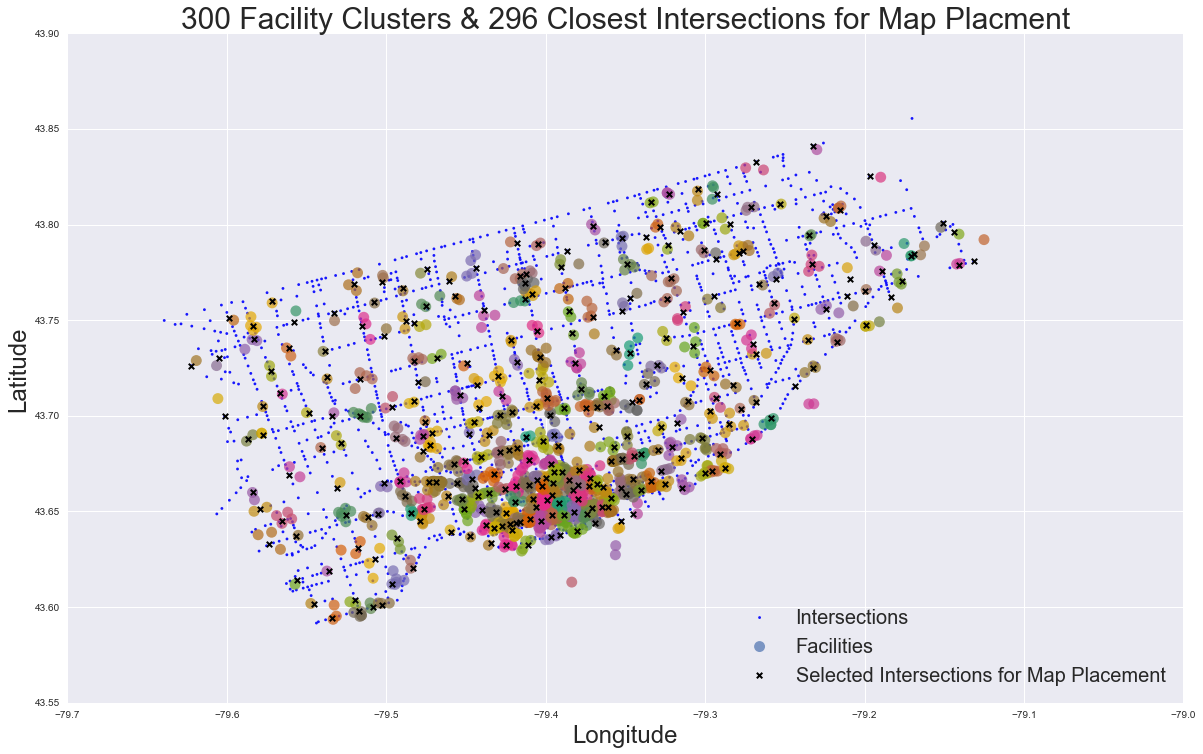

In [96]:
# Plot the selected 296 Intersections for Map Placement
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'],
                                  intersection_ped_df['latitude'],
                                  c='b', edgecolor='None', alpha=0.9, s=8)
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM300_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
map_intersection_scatter = ax.scatter(map_intersection_df['longitude'],
                                      map_intersection_df['latitude'], 
                                      marker='x', linewidths=2, c='k', s=30)
ax.set_title('300 Facility Clusters & 296 Closest Intersections for Map Placment', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([intersection_scatter, facility_scatter, map_intersection_scatter], 
          ['Intersections', 'Facilities', 'Selected Intersections for Map Placement'], 
          loc='lower right', fontsize = 20)
plt.show()

###  4.2 Case 2: Consider Both Distance and Pedestrian Volume
<a id = '4.2'></a>

In [97]:
# store index of cloest 3 intersections to each cluster centroid
cloest_intersection_index2 =[] 

# Find the closest 3 intersections using KDTree
for i in range(len(fac300_centroids)):
    distance, index = spatial.KDTree(intersection_coords).query(fac300_centroids[i], 3)
    cloest_intersection_index2.append(index)

# The returned index is a list of array
cloest_intersection_index2

[array([ 849, 1372,  477]),
 array([2127,  399, 1633]),
 array([331, 332, 330]),
 array([263, 264,  79]),
 array([2247, 1567, 1465]),
 array([403, 888, 357]),
 array([ 957,  808, 1506]),
 array([344, 345, 343]),
 array([1166, 1770, 1804]),
 array([2039, 1559, 2002]),
 array([1300, 1685,  825]),
 array([1758,  774,  703]),
 array([ 429, 1790, 1766]),
 array([  13,   14, 1972]),
 array([1507, 1046, 2063]),
 array([1562, 1776, 1711]),
 array([ 234, 1677, 1309]),
 array([ 177,   88, 1122]),
 array([ 626, 1043, 1853]),
 array([ 325, 1302, 1840]),
 array([2228,   68,  892]),
 array([1055, 1190, 2125]),
 array([950, 193, 534]),
 array([ 351,  361, 1264]),
 array([436,  98, 503]),
 array([1762, 2049, 1680]),
 array([1328, 1326,  554]),
 array([ 147, 2159,  148]),
 array([ 185, 1856, 2141]),
 array([ 292,  475, 1918]),
 array([55, 54, 56]),
 array([1432, 1629,  859]),
 array([2171, 1869,  207]),
 array([ 964, 1714, 1210]),
 array([1816, 1013,  921]),
 array([1528,  629,  736]),
 array([1072,  5

In [98]:
len(cloest_intersection_index2)

300

In [99]:
# create an empty dataframe with same schema as the intersection_ped_df
map_intersection_df2 = intersection_ped_df[intersection_ped_df['PX']<0]
map_intersection_df2

Empty DataFrame
Columns: [PX, main, midblock_route, side1_route, side2_route, latitude, longitude, 8hr_vel_vol, 8hr_ped_vol]
Index: []

In [100]:
print map_intersection_df2.columns
print map_intersection_df2.dtypes
print map_intersection_df2.empty

Index([u'PX', u'main', u'midblock_route', u'side1_route', u'side2_route', u'latitude', u'longitude', u'8hr_vel_vol', u'8hr_ped_vol'], dtype='object')
PX                  int64
main               object
midblock_route     object
side1_route        object
side2_route        object
latitude          float64
longitude         float64
8hr_vel_vol       float64
8hr_ped_vol       float64
dtype: object
True


In [101]:
for ary in cloest_intersection_index2:
    # five cloest intersection to a facility centroid
    temp_df = intersection_ped_df.iloc[ary]  
    # select the max pedestrian volume intersection
    # among the 3 cloest intersections
    max_ped_df = temp_df.ix[temp_df['8hr_ped_vol'].idxmax()]
    
    # appending the selected intersection row to map_intersection_df2
    map_intersection_df2 = map_intersection_df2.append(max_ped_df)

# 300 intersections, duplicates may exist
map_intersection_df2

PX               main midblock_route            side1_route                   side2_route   latitude  longitude   8hr_vel_vol   8hr_ped_vol
477    479     ST CLAIR AVE W            NaN             SPADINA RD                           NaN  43.684620 -79.411160   2028.000000  17770.000000
1633  1643       DON MILLS RD  255m NORTH OF           THE DONWAY E                PRIVATE ACCESS  43.734399 -79.342656   1088.000000  22102.000000
330    332         BLOOR ST W            NaN         WINDERMERE AVE                           NaN  43.650263 -79.480402   4470.000000  12678.000000
79      81     UNIVERSITY AVE            NaN            DUNDAS ST W                           NaN  43.654812 -79.388484  24106.666667  19116.333333
1567  1573        KINGSTON RD            NaN              LAWSON RD               OLD KINGSTON RD  43.784540 -79.168720    122.000000   7477.000000
888    891        KINGSTON RD            NaN        GLEN EVEREST RD                           NaN  43.697780 -79.256580    349.000000  10822.000000
808    811        FINCH AVE W            NaN              MILVAN DR                     RUMIKE RD  43.749990 -79.552270   1329.000000  23803.000000
343    345       DANFORTH AVE            NaN               PAPE AVE                           NaN  43.678903 -79.344862  12338.500000  16176.000000
1166  1169     SHEPPARD AVE W            NaN            BEECROFT RD                           NaN  43.761090 -79.413170  12422.500000  14177.000000
2039  2091        MIDLAND AVE  175m NORTH OF           MCNICOLL AVE                PRIVATE ACCESS  43.816080 -79.292880     85.000000  10597.000000
825    828         COLLEGE ST            NaN               GRACE ST                           NaN  43.655000 -79.415610   3536.000000   9584.000000
703    706        DUNDAS ST W            NaN          ISLINGTON AVE                           NaN  43.651410 -79.526390  12698.500000  13398.500000
1766  1779     LAWRENCE AVE W            NaN               RALPH ST                PRIVATE ACCESS  43.701100 -79.512100   1585.000000  13103.000000
14      16          KING ST E            NaN              CHURCH ST                           NaN  43.649916 -79.374409  11277.000000  13419.000000
2063  2116        FINCH AVE W   200m EAST OF           CHESSWOOD DR                           NaN  43.767040 -79.475180    271.000000  16105.000000
1562  1568     SHEPPARD AVE E            NaN             MALVERN ST                  PROGRESS AVE  43.794680 -79.234910    604.000000  16692.000000
234    236  LAKE SHORE BLVD W            NaN               TENTH ST                           NaN  43.600006 -79.508604   4580.500000   5002.000000
88      90     EGLINTON AVE E            NaN            BAYVIEW AVE                           NaN  43.711056 -79.377114  16480.500000  17475.500000
1043  1046       DON MILLS RD            NaN          LEITH HILL RD                PRIVATE ACCESS  43.777150 -79.347830   1590.000000  20633.000000
325    327        DUNDAS ST W            NaN             BLOOR ST W                           NaN  43.656308 -79.452406  17931.666667  12559.333333
68      70             BAY ST            NaN             BLOOR ST W                           NaN  43.669701 -79.389468  24246.000000  20546.000000
2125  2191        KINGSTON RD            NaN            OVERTURE RD                    PAYZAC AVE  43.758914 -79.197787    416.000000  22524.000000
950    953           DIXON RD            NaN             ATTWELL DR                    SKYWAY AVE  43.687960 -79.586810    373.000000  25847.000000
351    353            MAIN ST            NaN           DANFORTH AVE                           NaN  43.688159 -79.301805  11879.500000  13514.500000
98     100        BATHURST ST            NaN         EGLINTON AVE W                           NaN  43.700976 -79.425534  22556.250000   9294.250000
2049  2102      BIRCHMOUNT RD            NaN            VAUXHALL DR                           NaN  43.758980 -79.289490    592.000000  16191.000000
1326  1329  

In [102]:
# drop duplicates, and 289 unique intersections were selected 
# for map placement for the 300 facility clusters
map_intersection_df2 = map_intersection_df2.drop_duplicates()
map_intersection_df2

PX               main midblock_route            side1_route                   side2_route   latitude  longitude   8hr_vel_vol   8hr_ped_vol
477    479     ST CLAIR AVE W            NaN             SPADINA RD                           NaN  43.684620 -79.411160   2028.000000  17770.000000
1633  1643       DON MILLS RD  255m NORTH OF           THE DONWAY E                PRIVATE ACCESS  43.734399 -79.342656   1088.000000  22102.000000
330    332         BLOOR ST W            NaN         WINDERMERE AVE                           NaN  43.650263 -79.480402   4470.000000  12678.000000
79      81     UNIVERSITY AVE            NaN            DUNDAS ST W                           NaN  43.654812 -79.388484  24106.666667  19116.333333
1567  1573        KINGSTON RD            NaN              LAWSON RD               OLD KINGSTON RD  43.784540 -79.168720    122.000000   7477.000000
888    891        KINGSTON RD            NaN        GLEN EVEREST RD                           NaN  43.697780 -79.256580    349.000000  10822.000000
808    811        FINCH AVE W            NaN              MILVAN DR                     RUMIKE RD  43.749990 -79.552270   1329.000000  23803.000000
343    345       DANFORTH AVE            NaN               PAPE AVE                           NaN  43.678903 -79.344862  12338.500000  16176.000000
1166  1169     SHEPPARD AVE W            NaN            BEECROFT RD                           NaN  43.761090 -79.413170  12422.500000  14177.000000
2039  2091        MIDLAND AVE  175m NORTH OF           MCNICOLL AVE                PRIVATE ACCESS  43.816080 -79.292880     85.000000  10597.000000
825    828         COLLEGE ST            NaN               GRACE ST                           NaN  43.655000 -79.415610   3536.000000   9584.000000
703    706        DUNDAS ST W            NaN          ISLINGTON AVE                           NaN  43.651410 -79.526390  12698.500000  13398.500000
1766  1779     LAWRENCE AVE W            NaN               RALPH ST                PRIVATE ACCESS  43.701100 -79.512100   1585.000000  13103.000000
14      16          KING ST E            NaN              CHURCH ST                           NaN  43.649916 -79.374409  11277.000000  13419.000000
2063  2116        FINCH AVE W   200m EAST OF           CHESSWOOD DR                           NaN  43.767040 -79.475180    271.000000  16105.000000
1562  1568     SHEPPARD AVE E            NaN             MALVERN ST                  PROGRESS AVE  43.794680 -79.234910    604.000000  16692.000000
234    236  LAKE SHORE BLVD W            NaN               TENTH ST                           NaN  43.600006 -79.508604   4580.500000   5002.000000
88      90     EGLINTON AVE E            NaN            BAYVIEW AVE                           NaN  43.711056 -79.377114  16480.500000  17475.500000
1043  1046       DON MILLS RD            NaN          LEITH HILL RD                PRIVATE ACCESS  43.777150 -79.347830   1590.000000  20633.000000
325    327        DUNDAS ST W            NaN             BLOOR ST W                           NaN  43.656308 -79.452406  17931.666667  12559.333333
68      70             BAY ST            NaN             BLOOR ST W                           NaN  43.669701 -79.389468  24246.000000  20546.000000
2125  2191        KINGSTON RD            NaN            OVERTURE RD                    PAYZAC AVE  43.758914 -79.197787    416.000000  22524.000000
950    953           DIXON RD            NaN             ATTWELL DR                    SKYWAY AVE  43.687960 -79.586810    373.000000  25847.000000
351    353            MAIN ST            NaN           DANFORTH AVE                           NaN  43.688159 -79.301805  11879.500000  13514.500000
98     100        BATHURST ST            NaN         EGLINTON AVE W                           NaN  43.700976 -79.425534  22556.250000   9294.250000
2049  2102      BIRCHMOUNT RD            NaN            VAUXHALL DR                           NaN  43.758980 -79.289490    592.000000  16191.000000
1326  1329  

In [103]:
# Check the pedestrian volume of the select intersections
map_intersection_df2['8hr_ped_vol'].describe()

count      288.000000
mean     15690.982060
std       6761.628336
min        567.000000
25%      10800.500000
50%      14615.250000
75%      19159.500000
max      40868.000000
Name: 8hr_ped_vol, dtype: float64

If we consider both distance and pedestrian volume, the average 8 hour pedestrian volume is 16004.4 for the selected 286 intersections. In other words intersections selected by this method has in average 4758 more pedestrian volume or 42% pedestrian volume in 8 Hr period compare to the intersection selected by only considering distance. This is a huge difference. Therefore, we will select intersections using the second method, which considers both distance and pedestrian volume.

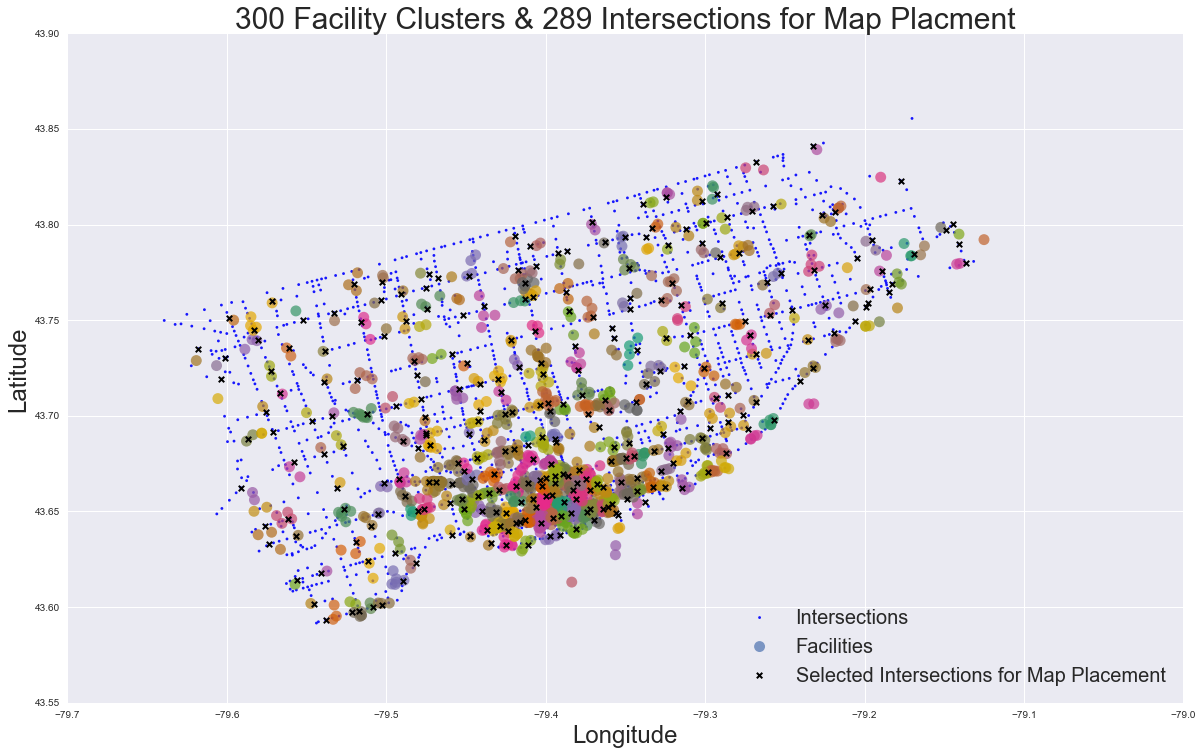

In [104]:
# Plot select 289 Intersections that for Map Placement
fig, ax = plt.subplots(figsize=[20, 12])
intersection_scatter = ax.scatter(intersection_ped_df['longitude'],
                                  intersection_ped_df['latitude'],
                                  c='b', edgecolor='None', alpha=0.9, s=8)
facility_scatter = ax.scatter(facility_df['longitude'],  facility_df['latitude'], c=KM300_label,
                              cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=120)
map_intersection_scatter = ax.scatter(map_intersection_df2['longitude'],
                                      map_intersection_df2['latitude'], 
                                      marker='x', linewidths=2, c='k', s=30)
ax.set_title('300 Facility Clusters & 289 Intersections for Map Placment', fontsize = 30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)
ax.legend([intersection_scatter, facility_scatter, map_intersection_scatter], 
          ['Intersections', 'Facilities', 'Selected Intersections for Map Placement'], 
          loc='lower right', fontsize = 20)
plt.show()

In [105]:
# Plot selected intersection on interactive map
selected_intersection_map = folium.Map(location = [43.6532, -79.3832])
selected_intersection_map.save('selected_intersection.html')

# Add markers of facilities
intersection_cluster = folium.MarkerCluster().add_to(selected_intersection_map)
for index, row in map_intersection_df2.iterrows():
    folium.Marker([row["latitude"],row["longitude"]] ).add_to(intersection_cluster)    
    
selected_intersection_map

From this interactive map, we can see the final selected approximate 300 intersections for map placement if we divide the 1397 cultural facilities into 300 clusters. 

## 5 Future Improvement
<a id = '5'></a>
There is a lot we can do to improve our current soltuion. 
1. Explore other methodologies. Clustering is only one of the possible methodolgies that may lead to a solution. We can also try other methodologies and compare the results. Formulating the problem as an optimization problem is a worth trying direction. Or we can combine clustering and optimization by applying optimization to each clusters.
2. Using more point of interest data. In our current study, we only used 1397 cultural facilities for building our solution. There is a lot more point of interest(such as hospitals, colleges or universities, attractions, commerical areas, etc.) we need to incorporate to make the study more representative.
3. Consider more needs when choose an intersection for map placment. In our current study, we considered distance and pedestrian volume. Other needs we should consider include:
  * having high densities of visitors who are unfamiliar with the City
  * having changes in mode of travel
  * being on a main street
  * being in an area that is difficult to navigate
  * being close to hospitals, colleges or universities
  * being close to a city centre  
4. Insights from domain experts. City planners have more practical insights on whether an intersection is appropriate for map placement. We can improve our solution by taking advices from domain experts.